# Environment setting

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

# 1. Data Preparation

## 1.1 Importing data

In [2]:
loan_data_backup = pd.read_csv('data/loan_data_2007_2014.csv')

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/3847287107.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('data/loan_data_2007_2014.csv')


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
pd.options.display.max_columns = None # display all the columns

## 1.2 Explore Data

In [5]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [6]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 1.3 General preprocessing

### 1.3.1 emp_length and term variables

As we can see here, term and emp_length should be in numeric type, not object, so we will convert them to numeric data.

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
# Store the ‘employment length’ variable in a new variable called ‘employment length int’ and start to remove text elements
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '') 
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace(np.nan, str(0))

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/568162535.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [11]:
# Store the ‘term’ variable in a new variable called ‘term int’ and start to remove text elements
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [12]:
def numeric(variable) -> float:
    """Transforms the values to numeric type and check again the type of the values.
    Args:
        variable: str
    Returns:
        variable: numeric"""
    loan_data[variable] = pd.to_numeric(loan_data[variable])
    print(type(loan_data[variable][0]))
    print(loan_data[variable].unique())

In [13]:
numeric('emp_length_int')
numeric('term_int')

<class 'numpy.int64'>
[10  0  1  3  8  9  4  5  6  2  7]
<class 'numpy.int64'>
[36 60]


In [14]:
loan_data.drop(columns= ['emp_length','term'], inplace =True)

### 1.3.2 Date variables

In [15]:
def date_type(column_list):
    """Convert date columns from loan_data to datetime format and create a new column as the difference
       between test date and the date of the columns.
    Args:
        column_list: list of variables in loan data
    Returns:
        new column in loan_data"""
    test_date = pd.to_datetime('2017-12-01')# Because the data is older, let's choose the test date is 2017-12-01
    for column in column_list:
        loan_data[column] = pd.to_datetime(loan_data[column], format = "%b-%y")
        # Calculate the difference between two dates in months, turn it to numeric datatype and round it.
        loan_data['months_since_' + column] = round(pd.to_numeric((test_date - loan_data[column]) / np.timedelta64(1, 'M')))
        # Assign values which are negative in the date column equal to the max value of that column
        loan_data['months_since_' + column] = loan_data['months_since_' + column].apply(lambda x: loan_data['months_since_' + column].max() if x <0 else x)
        print(loan_data['months_since_' + column].describe())

In [16]:
date_columns =['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']
date_type(date_columns)

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64
count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_issue_d, dtype: float64
count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: months_since_last_pymnt_d, dtype: float64
count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: months_since_last_credit_pull_d, dtype: float64


### 1.3.3 Check for the missing values and clean

In [17]:
loan_data.isna().any()

Unnamed: 0                         False
id                                 False
member_id                          False
loan_amnt                          False
funded_amnt                        False
                                   ...  
term_int                           False
months_since_earliest_cr_line       True
months_since_issue_d               False
months_since_last_pymnt_d           True
months_since_last_credit_pull_d     True
Length: 79, dtype: bool

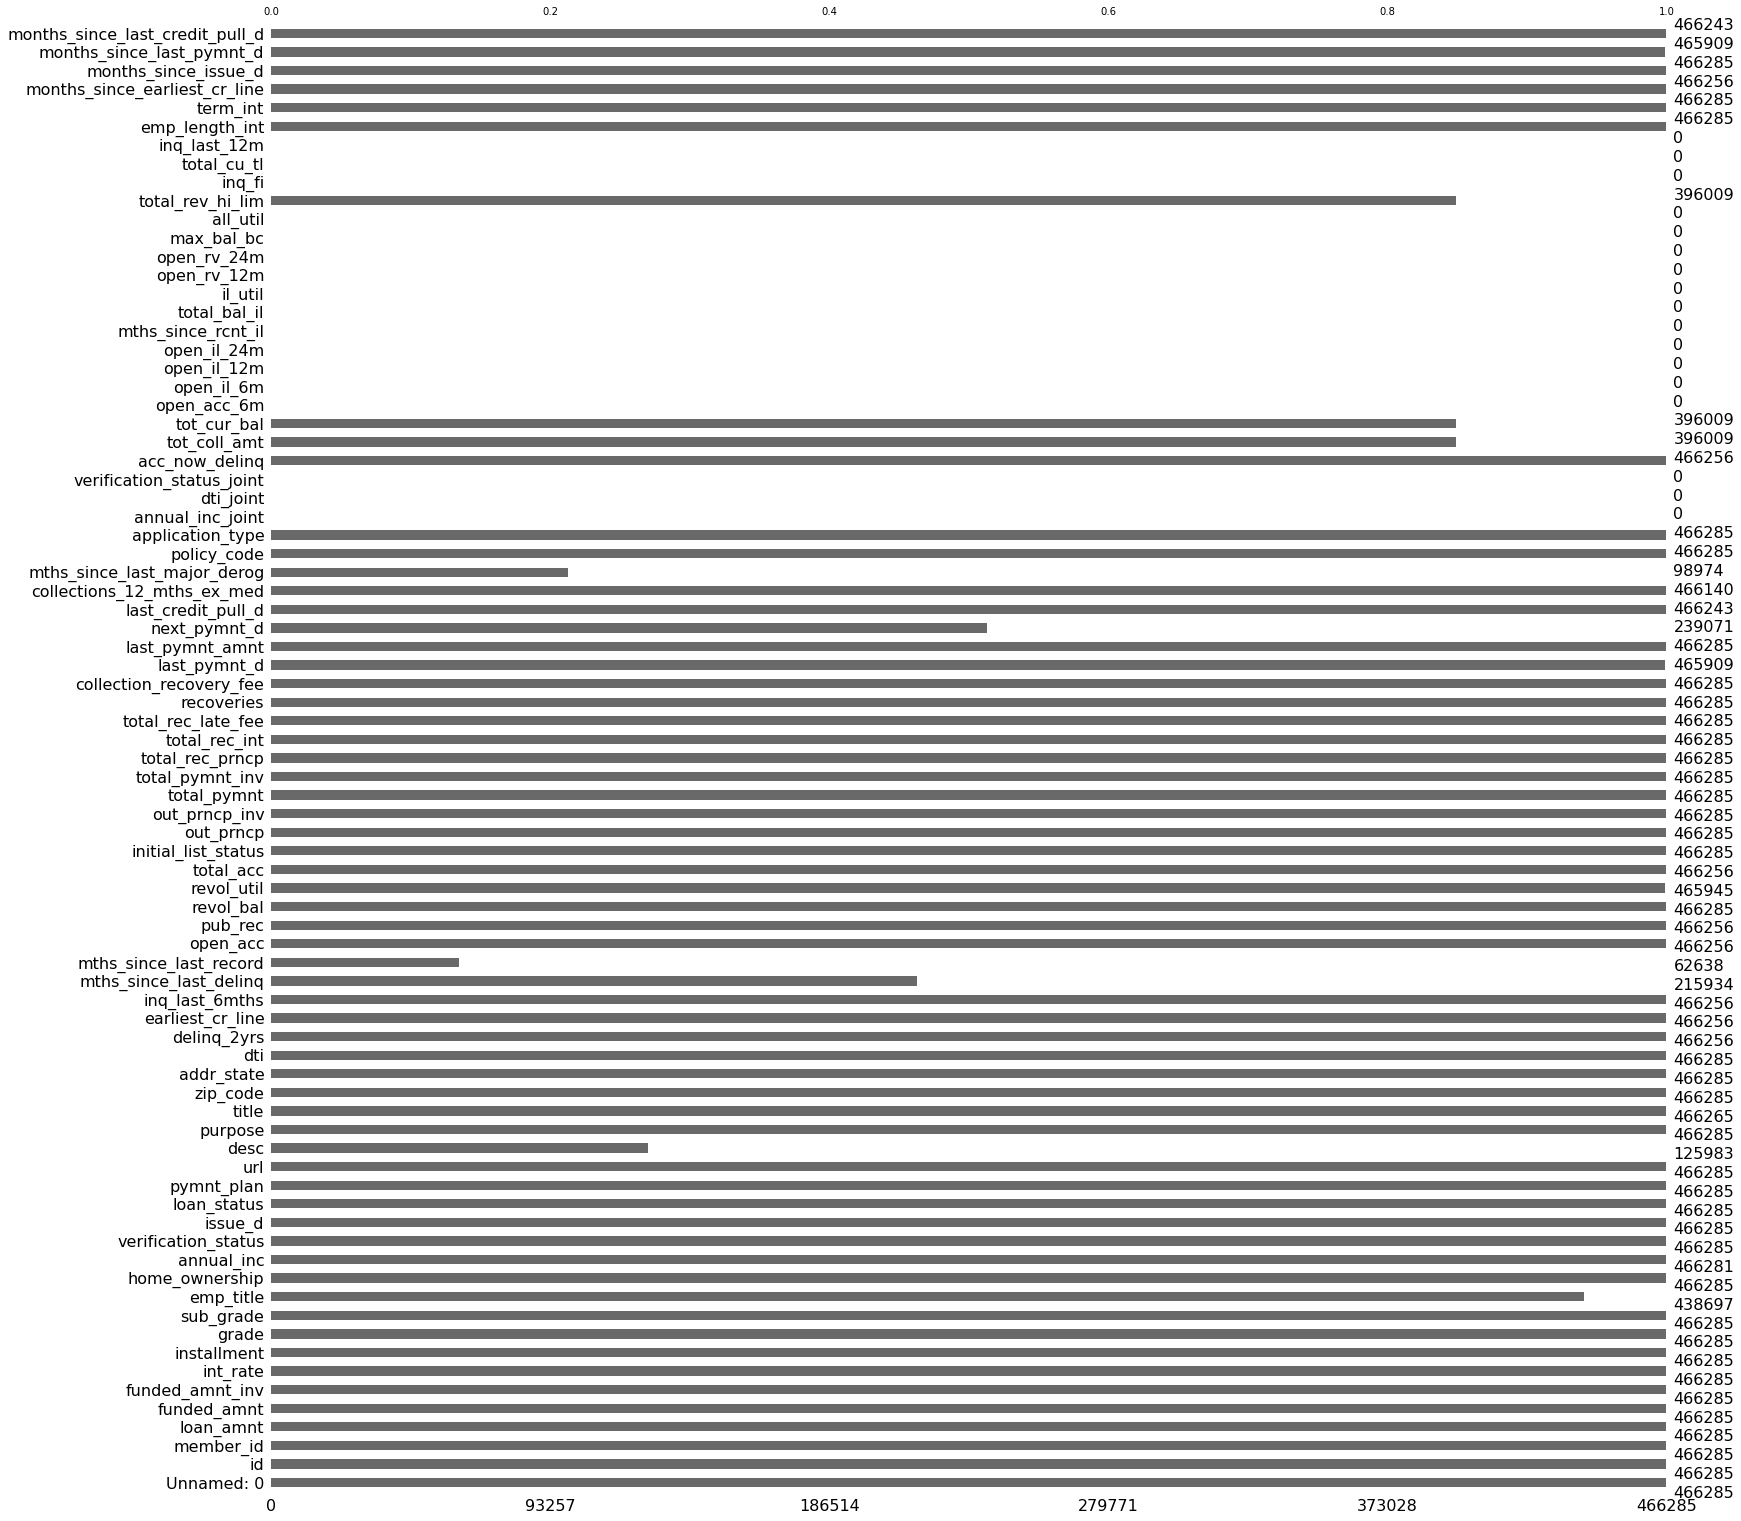

In [18]:
msno.bar(loan_data)
plt.show()

In [19]:
# Drop columns with more than 80% null values
loan_data.dropna(thresh = loan_data.shape[0]*0.2, how = 'all', axis =1, inplace =True)

In [20]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

# 2. Data exploration

In [21]:
# We will remove some redundant data which are really to observe
loan_data.drop(columns =['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title',
                          'zip_code', 'next_pymnt_d', 'recoveries', 'collection_recovery_fee',
                          'total_rec_prncp', 'total_rec_late_fee','Unnamed: 0'], inplace = True)

## 2.1 Target variable

In [22]:
# We choose loan_status as the target variable
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [23]:
# Display the proportion of each status in total
loan_data['loan_status'].value_counts(normalize = True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Here we classify 'good' customers if their status is: Fully Paid, Current, In Grace Period, or Does not meet the credit policy. Status: Fully Paid. The others belong to bad customers.

In [24]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Fully Paid', 'Current',
                                                       'Does not meet the credit policy. Status:Fully Paid',
                                                       'In Grace Period']), 1, 0)

In [25]:
loan_data.drop(columns= ['loan_status'], inplace =True)

## 2.2 Splitting data

In [26]:
X = loan_data.drop('good_bad', axis = 1)
y = loan_data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023, stratify =y)

## 2.3 Feature selection

The loan data has 2 types of variables: discrete and continuous variables. With categorical features, we will use Chi-Square Statistic to determine the extent of relationship or dependence between two categorical variables — in our case, one categorical input feature, and the other, a categorical target variable. With continuous features, we will use ANOVA F-statistic, as variation between sample means and variation within the samples. The higher the F-value, the lower the corresponding p-value.


## 2.3.1 Chi-squared statistic for categorical features

In [27]:
# Create categorical subset from training data
X_train_cat = X_train.select_dtypes(include = 'object').copy()

In [28]:
# define an empty dictionary to store chi-squared test results
chi2_test = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat.columns:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_test.setdefault('Feature',[]).append(column)
    chi2_test.setdefault('Chi squared-value',[]).append(round(chi,2))
    chi2_test.setdefault('p-value',[]).append(round(p, 6))
    

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_test)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,Chi squared-value,p-value
0,grade,10396.51,0.000000
1,home_ownership,755.38,0.000000
2,verification_status,794.38,0.000000
3,purpose,1486.26,0.000000
4,addr_state,429.01,0.000000
5,initial_list_status,790.61,0.000000
6,pymnt_plan,19.85,0.000008
7,application_type,0.00,1.000000


With the significance level of 5%, we decide to retain the first 7 features and drop the last one

## 2.3.2 ANOVA F-Statistic for numerical features

In [29]:
# Create numerical subset from training data
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [30]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=5)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,months_since_last_pymnt_d,22028.336115,0.00000
1,total_pymnt_inv,14647.804492,0.00000
2,total_pymnt,14541.487706,0.00000
3,int_rate,11578.600624,0.00000
4,last_pymnt_amnt,11154.909882,0.00000
5,out_prncp,8525.195645,0.00000
6,out_prncp_inv,8523.789249,0.00000
7,months_since_last_credit_pull_d,6573.083237,0.00000
8,months_since_issue_d,2623.197709,0.00000
9,inq_last_6mths,2034.134312,0.00000


With the significance level of 5%, we decide to retain the first 28 features and drop the the others

## 2.3.3 Pair wise correlations to detect multicollinearity

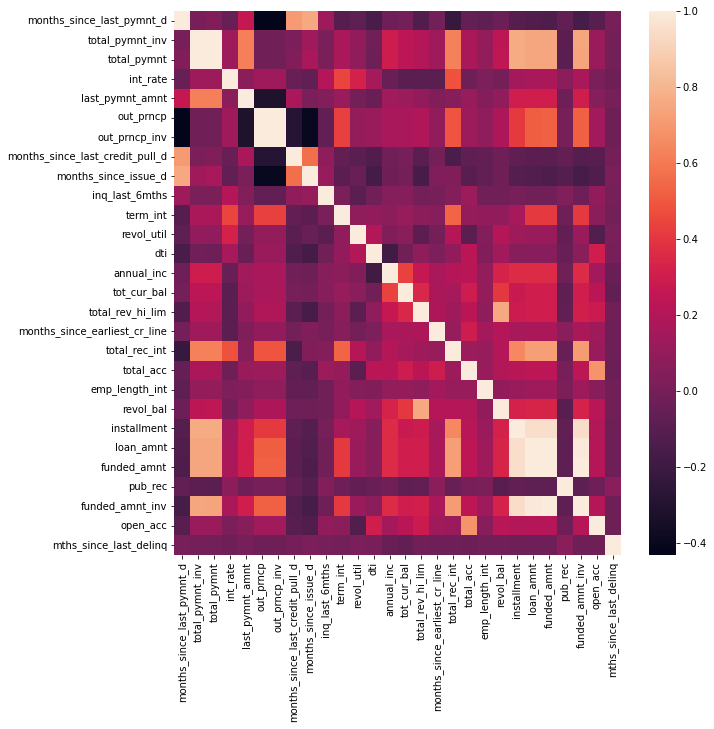

In [31]:
# save the top 28 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:28,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.heatmap(corrmat);

In order to avoid multicollinearity, we will drop features with the correlation which equal 1 with the other feature as follows:
- loan_amnt
- out_prncp_inv
- total_pymnt_inv
- funded_amnt_inv

## 2.4 Creating dummy variables

In [352]:
df_inputs_prepr = X_train.copy()
df_targets_prepr = y_train.copy()

#df_inputs_prepr = X_test.copy()
#df_targets_prepr = y_test.copy()


In [353]:
# We will adjust our train and test data based on the feature selection above
drop_columns_list = ANOVA_F_table.iloc[28:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[7:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv','loan_amnt','funded_amnt_inv'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(df_inputs_prepr, drop_columns_list)

### 2.4.1 Discrete variables

In [354]:
def dummy_variable(columns_list):
    """create dummy variables.
    Args:
        column_list: list of discrete variables 
    Returns:
        new columns of dummy variables"""
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df_inputs_prepr[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    return df_dummies

# We create dummy variables from 7 independent variables as in the list below
disc_list =['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status','pymnt_plan']
df_dummies= dummy_variable(disc_list)

In [355]:
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns.
df_inputs_prepr = pd.concat([df_inputs_prepr, df_dummies], axis = 1)

### Weight of Evidence and Information value

Let’s now calculate Weight of Evidence (WoE) and Information value (IV) for our training data and perform the required feature engineering.

In [356]:
def woe_discrete(df, cat_variabe_name, y_df):
    """ function to calculate WoE and IV of categorical features.
    Args:
        df(Dataframe): df_inputs_prepr
        cat_variabe_name(string): discrete variables name
        y_df(Dataframe): df_targets_prepr
    Returns:
        new DataFrame """
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

Once we have calculated WoE and IV values, next comes to select which bins to combine and whether to drop any feature given its IV. In order to do that, we need to visualize the graph.

### Visualizing WoE values

In [357]:
sns.set_theme()
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    """The function displays a graph.
    Args:
        df_WoE: Dataframe
        rotation_of_x_axis_labels(number): The number parameter has a default value of 0.
        y_df(Dataframe): y_train
    Returns:
        a graph"""
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.xticks(rotation = rotation_of_x_axis_labels)

### grade

In [358]:
df_grade= woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_grade

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2690,0.714498,0.007211,1922.0,768.0,0.005802,0.018396,-1.153954,NaN,NaN,0.289477
1,F,10590,0.754863,0.028389,7994.0,2596.0,0.024131,0.062181,-0.946566,0.040365,0.207388,0.289477
2,E,28518,0.801599,0.076450,22860.0,5658.0,0.069005,0.135524,-0.674967,0.046736,0.271599,0.289477
3,D,61685,0.842247,0.165363,51954.0,9731.0,0.156829,0.233083,-0.396243,0.040648,0.278724,0.289477
4,C,100054,0.882413,0.268221,88289.0,11765.0,0.266509,0.281803,-0.055799,0.040167,0.340444,0.289477
5,B,109723,0.919288,0.294141,100867.0,8856.0,0.304477,0.212125,0.361422,0.036874,0.417221,0.289477
6,A,59768,0.960263,0.160224,57393.0,2375.0,0.173247,0.056888,1.113639,0.040975,0.752217,0.289477


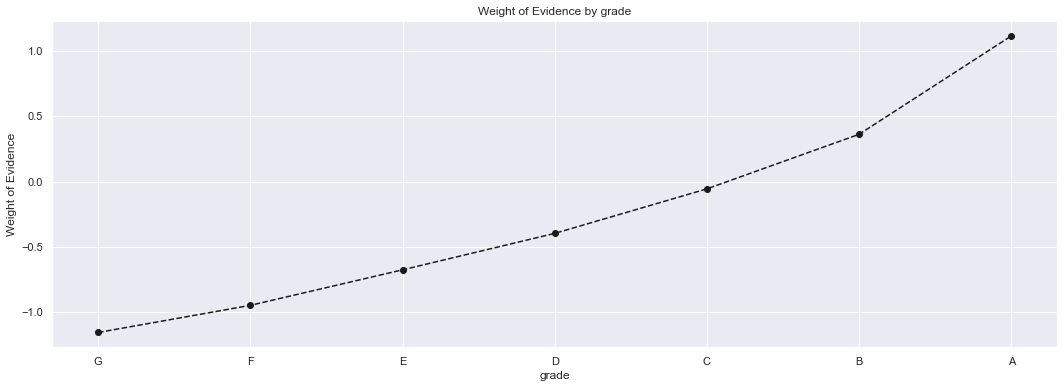

In [359]:
plot_by_woe(df_grade)

### verification_status

In [360]:
df_verification_status = woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_verification_status

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134495,0.869527,0.360549,116947.0,17548.0,0.353017,0.420321,-0.174505,NaN,NaN,0.021167
1,Source Verified,119883,0.893329,0.321378,107095.0,12788.0,0.323277,0.306307,0.053924,0.023803,0.228428,0.021167
2,Not Verified,118650,0.903810,0.318073,107237.0,11413.0,0.323706,0.273372,0.169003,0.010480,0.115079,0.021167


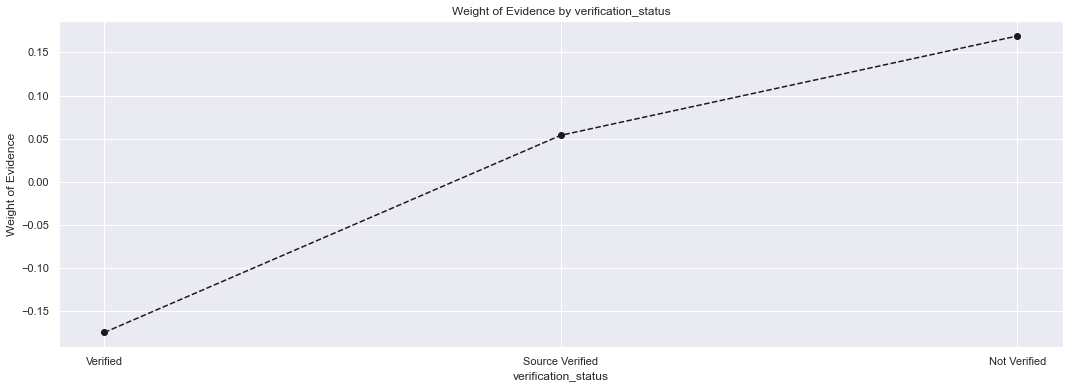

In [361]:
plot_by_woe(df_verification_status)

Combining WoE bins or establishing a distinct missing category is unnecessary due to the discrete and monotonic nature of WoE and the absence of any missing values in: 'grade' and 'verification_status'. As a result, we keep the same bins as the original category of the two above discrete variables. 

### home_ownership

In [362]:
df_ownership = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_ownership

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,144,0.784722,0.000386,113.0,31.0,0.000341,0.000743,-0.777885,NaN,NaN,inf
1,NONE,42,0.857143,0.000113,36.0,6.0,0.000109,0.000144,-0.279526,0.072421,0.498359,inf
2,RENT,150829,0.871629,0.404337,131467.0,19362.0,0.396847,0.463772,-0.155842,0.014487,0.123684,inf
3,OWN,33289,0.888522,0.089240,29578.0,3711.0,0.089284,0.088888,0.004444,0.016892,0.160286,inf
4,MORTGAGE,188723,0.901236,0.505922,170084.0,18639.0,0.513416,0.446454,0.139751,0.012714,0.135307,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.098764,inf,inf


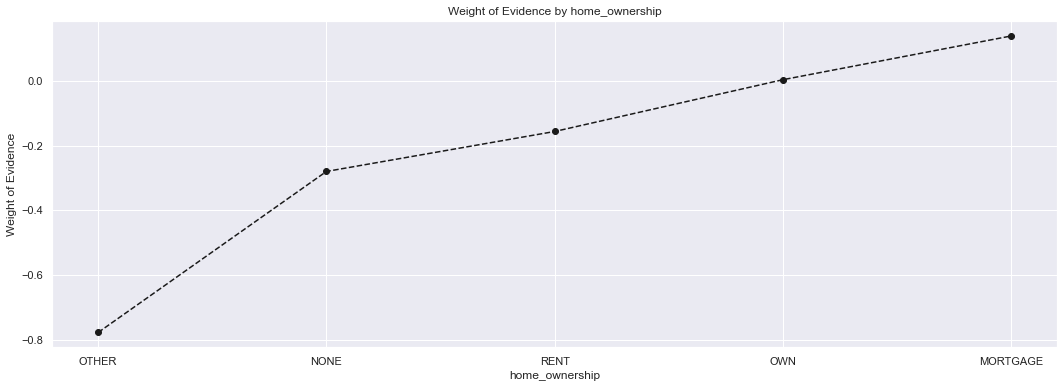

In [363]:
plot_by_woe(df_ownership)

OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.  'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything. We combine them in one category, 'RENT_OTHER_NONE_ANY'. 

We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
- RENT_OTHER_NONE_ANY' will be the reference category.

In [364]:
if ['home_ownership:ANY'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['home_ownership:ANY'] = 0
######
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

### purpose

In [365]:
df_purpose= woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_purpose

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,324,0.774691,0.000869,251.0,73.0,0.000758,0.001749,-0.836292,NaN,NaN,0.035776
1,small_business,5609,0.779105,0.015036,4370.0,1239.0,0.013191,0.029677,-0.810827,0.004414,0.025465,0.035776
2,renewable_energy,275,0.836364,0.000737,230.0,45.0,0.000694,0.001078,-0.439869,0.057259,0.370958,0.035776
3,moving,2386,0.849120,0.006396,2026.0,360.0,0.006116,0.008623,-0.343571,0.012756,0.096298,0.035776
4,other,18967,0.859176,0.050846,16296.0,2671.0,0.049191,0.063978,-0.262819,0.010057,0.080752,0.035776
5,house,1814,0.859978,0.004863,1560.0,254.0,0.004709,0.006084,-0.256179,0.000801,0.006640,0.035776
6,medical,3661,0.866430,0.009814,3172.0,489.0,0.009575,0.011713,-0.201530,0.006452,0.054648,0.035776
7,wedding,1864,0.877146,0.004997,1635.0,229.0,0.004935,0.005485,-0.105609,0.010716,0.095921,0.035776
8,vacation,1964,0.877800,0.005265,1724.0,240.0,0.005204,0.005749,-0.099522,0.000654,0.006087,0.035776
9,debt_consolidation,219454,0.884172,0.588304,194035.0,25419.0,0.585715,0.608853,-0.038744,0.006371,0.060778,0.035776


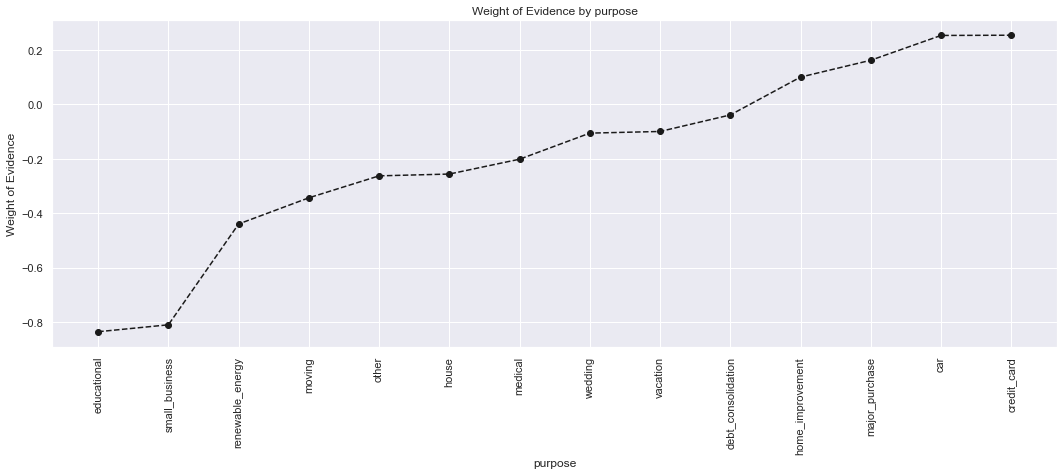

In [366]:
plot_by_woe(df_purpose,90)

We combine 'educational', 'small_business', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__ren_en__mov__house'.

We combine 'other', 'medical', 'vacation', wedding' in one category: 'oth__med__vacation__wed'.

We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
We leave 'debt_consolidtion' in a separate category.

We leave 'credit_card' in a separate category.

- 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.

In [367]:
df_inputs_prepr['purpose:educ__sm_b__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation_wed'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:wedding']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

### initial_list_status

In [368]:
df_initial_status = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_initial_status

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242480,0.877429,0.650032,212759.0,29721.0,0.642235,0.711897,-0.102979,NaN,NaN,0.02226
1,w,130548,0.907865,0.349968,118520.0,12028.0,0.357765,0.288103,0.216559,0.030436,0.319538,0.02226


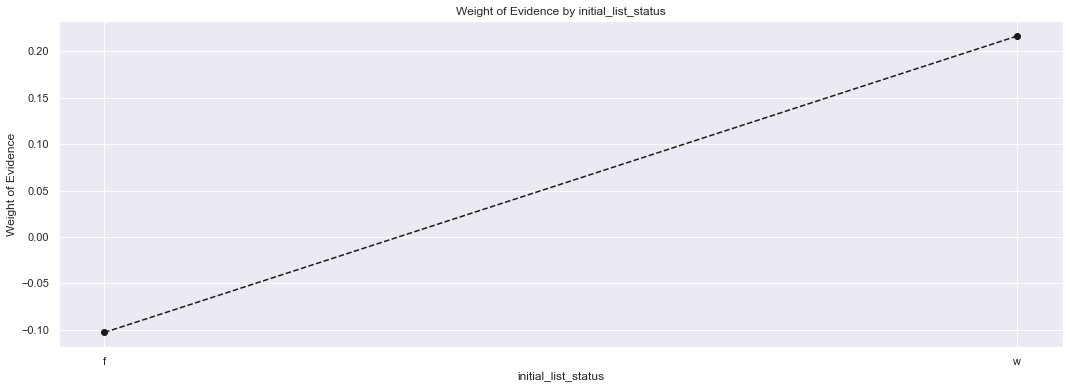

In [369]:
plot_by_woe(df_initial_status)

### pymnt_plan

In [370]:
df_plan = woe_discrete(df_inputs_prepr, 'pymnt_plan', df_targets_prepr)
df_plan

,pymnt_plan,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,y,7,0.285714,0.000019,2.0,5.0,0.000006,0.00012,-2.987576,NaN,NaN,0.00034
1,n,373021,0.888092,0.999981,331277.0,41744.0,0.999994,0.99988,0.000114,0.602378,2.98769,0.00034


The number of 'y' is nelegible compared to the number of 'n', aLso the IV value is very small (<0.02), so with this features, we decide to exclude from our model.

In [371]:
df_inputs_prepr.drop(columns =['pymnt_plan'], inplace =True)

### addr_state

In [372]:
df_inputs_prepr['addr_state'].nunique()

50

In [373]:
df_addr = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_addr

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,11,0.454545,0.000029,5.0,6.0,0.000015,0.000144,-2.253607,NaN,NaN,inf
1,IA,11,0.727273,0.000029,8.0,3.0,0.000024,0.000072,-1.090456,0.272727,1.163151,inf
2,NV,5238,0.862543,0.014042,4518.0,720.0,0.013638,0.017246,-0.234712,0.135270,0.855744,inf
3,AL,4711,0.867756,0.012629,4088.0,623.0,0.012340,0.014923,-0.190021,0.005213,0.044691,inf
4,HI,1941,0.872746,0.005203,1694.0,247.0,0.005114,0.005916,-0.145826,0.004990,0.044195,inf
5,FL,25217,0.874133,0.067601,22043.0,3174.0,0.066539,0.076026,-0.133283,0.001387,0.012543,inf
6,NM,2086,0.879195,0.005592,1834.0,252.0,0.005536,0.006036,-0.086460,0.005062,0.046823,inf
7,MO,6036,0.879722,0.016181,5310.0,726.0,0.016029,0.017390,-0.081488,0.000527,0.004972,inf
8,NY,32294,0.880628,0.086573,28439.0,3855.0,0.085846,0.092338,-0.072895,0.000906,0.008593,inf
9,NJ,14379,0.881424,0.038547,12674.0,1705.0,0.038258,0.040839,-0.065298,0.000796,0.007597,inf


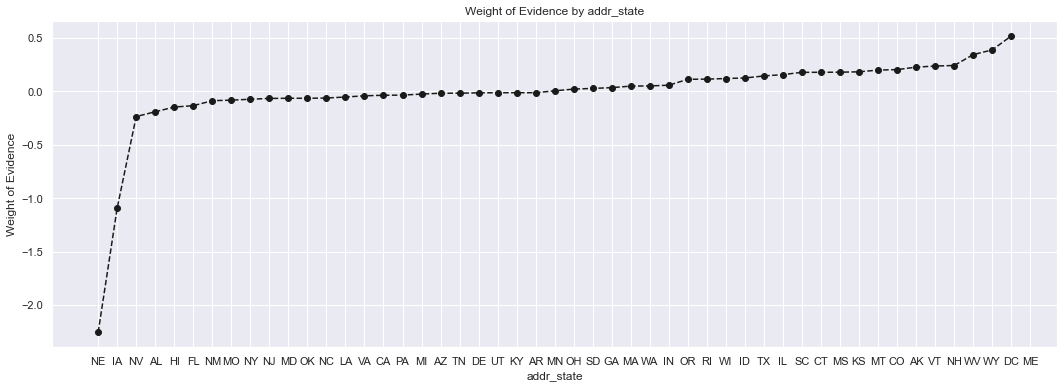

In [374]:
plot_by_woe(df_addr)

In [375]:
# Here, ND is missing in the df_woe table because there is no borrower from this address. We will assign 0 to ND
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0
# Here, ME is missing in the df_woe table of y_test data. We will assign 0 to ME
if ['addr_state:ME'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ME'] = 0   

Because NE, IA have the lowest values of WoE; and DC, ME have the highest values of WoE, we will leave them there.

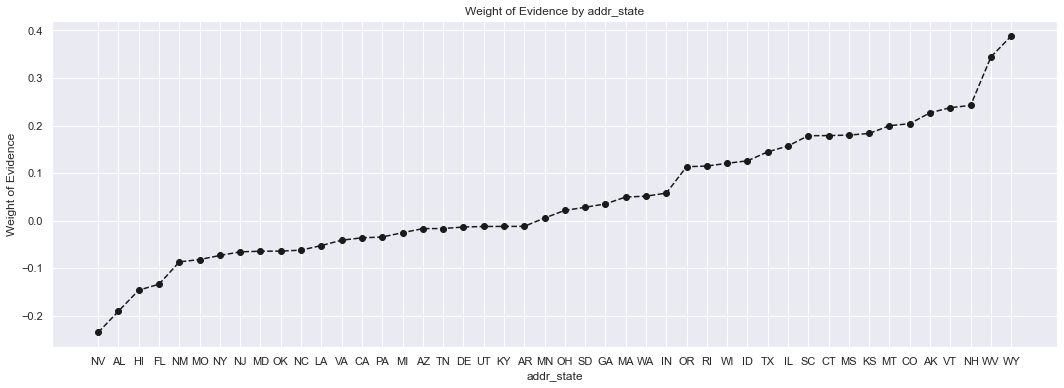

In [376]:
plot_by_woe(df_addr.iloc[2: -2, : ])

It is clear to see that NV has a distinctive WoE but it has quite a few observations. FL, AL, and HI have the same WoE so they should be in the same category. Combining NE and IA which also have very few observations, and ND, we create one category: ND_NE_IA_NV_FL_AL_HI. 

Similarly, WV and WY have distinctive WoE values but they include few observations, so that we will combine WV, WY and DC, ME in one category: WV_WY_DC_ME

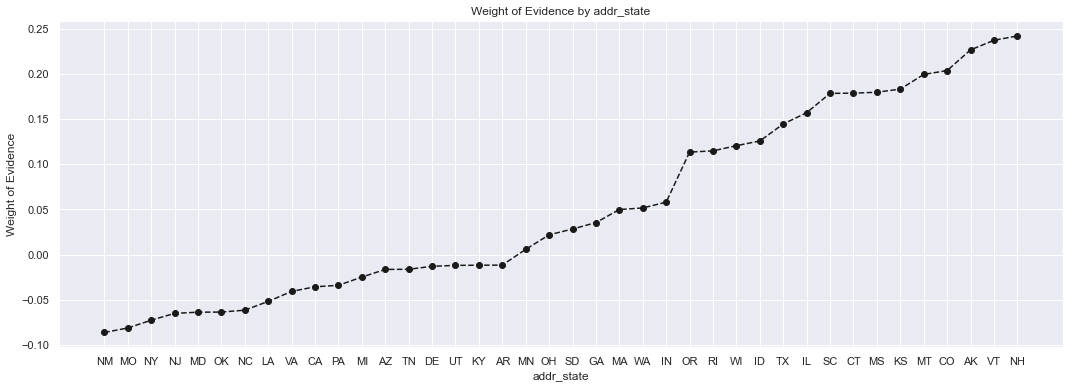

In [377]:
# Let's look more closely in the graph
plot_by_woe(df_addr.iloc[6: -4, : ])

In [378]:
# We create the following categories:
# 'NM','MO'
# 'NY'
# 'NJ','MD','OK','NC','LA','VA'
# 'CA'
# 'PA','MI','AZ','TN','DE','UT','KY',AR'
# 'MN','OH','SD',''GA',
# 'MA','WA','IN'
# 'OR','RI',WI','ID'
# 'TX'
# 'IL','SC','CT','MS','KS'
# 'MT','CO','AK','VT','NH'

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_AL_HI'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_MO'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:MO']])

df_inputs_prepr['addr_state:PA_MI_AZ_TN_DE_UT_KY_AR'] = sum([df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:UT'],
                                              df_inputs_prepr['addr_state:KY'], df_inputs_prepr['addr_state:AR']])

df_inputs_prepr['addr_state:NJ_MD_OK_NC_LA_VA'] = sum([df_inputs_prepr['addr_state:NJ'], df_inputs_prepr['addr_state:MD'],
                                              df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:NC'],
                                              df_inputs_prepr['addr_state:LA'],df_inputs_prepr['addr_state:VA']])                                                        
                                             
df_inputs_prepr['addr_state:MN_OH_SD_GA'] = sum([df_inputs_prepr['addr_state:MN'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:SD'], df_inputs_prepr['addr_state:GA']])
                                              

df_inputs_prepr['addr_state:MA_WA_IN'] = sum([df_inputs_prepr['addr_state:MA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:IN']])      
                
df_inputs_prepr['addr_state:OR_RI_WI_ID'] = sum([df_inputs_prepr['addr_state:OR'], df_inputs_prepr['addr_state:RI'],
                                              df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:ID']]) 
                
df_inputs_prepr['addr_state:IL_SC_CT_MS_KS'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:SC'],
                                                    df_inputs_prepr['addr_state:CT'], df_inputs_prepr['addr_state:MS'],
                                                    df_inputs_prepr['addr_state:KS']])

df_inputs_prepr['addr_state:MT_CO_AK_VT_NH'] = sum([df_inputs_prepr['addr_state:MT'], df_inputs_prepr['addr_state:CO'],
                                                    df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:VT'],
                                                    df_inputs_prepr['addr_state:NH']])

df_inputs_prepr['addr_state:WV_WY_DC_ME'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:WY'],
                                              df_inputs_prepr['addr_state:DC'], df_inputs_prepr['addr_state:ME']])                                     

### 2.4.2  Continuous Variables

We use the same function of calculating and visualizing the WoE and IVfor Continuos Variables. 

In [379]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    """ function to calculate WoE and IV of categorical features.
    Args:
        df(Dataframe): df_inputs_prepr
        continuous_variabe_name(string): continuous variables name
        y_df(Dataframe): df_targets_prepr
    Returns:
        new DataFrame """
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### term

In [380]:
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [381]:
df_term = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_term

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270492,0.900455,0.725125,243566.0,26926.0,0.735229,0.64495,0.131010,NaN,NaN,0.038315
1,60,102536,0.855436,0.274875,87713.0,14823.0,0.264771,0.35505,-0.293395,0.045019,0.424405,0.038315


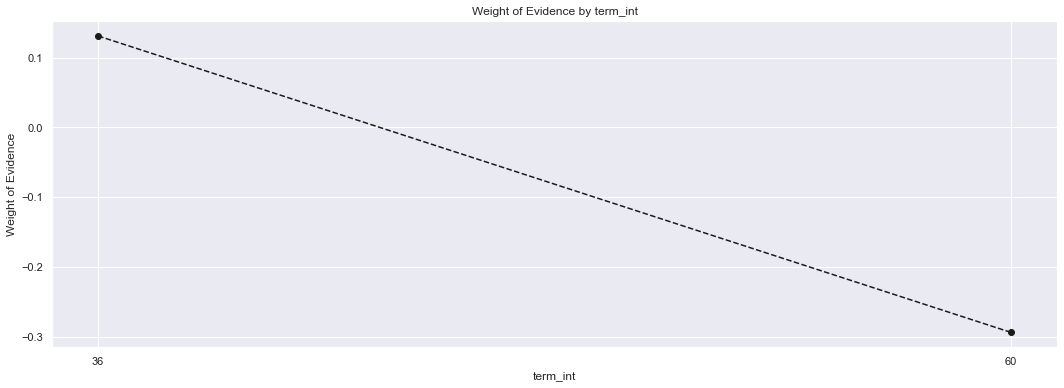

In [382]:
plot_by_woe(df_term)

In [383]:
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### emp_length_int

In [384]:
df_inputs_prepr['emp_length_int'].unique()

array([ 2, 10,  5,  4,  1,  0,  7,  9,  6,  8,  3])

In [385]:
df_emp_length = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_emp_length 

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,45769,0.873692,0.122696,39988.0,5781.0,0.120708,0.138470,-0.137283,NaN,NaN,0.006147
1,1,23683,0.885234,0.063489,20965.0,2718.0,0.063285,0.065103,-0.028327,0.011542,0.108955,0.006147
2,2,33149,0.888141,0.088865,29441.0,3708.0,0.088871,0.088816,0.000610,0.002907,0.028938,0.006147
3,3,29260,0.889303,0.078439,26021.0,3239.0,0.078547,0.077583,0.012354,0.001161,0.011744,0.006147
4,4,22384,0.886839,0.060006,19851.0,2533.0,0.059922,0.060672,-0.012435,0.002464,0.024789,0.006147
5,5,24657,0.882305,0.066100,21755.0,2902.0,0.065670,0.069511,-0.056842,0.004534,0.044407,0.006147
6,6,20924,0.880616,0.056092,18426.0,2498.0,0.055621,0.059834,-0.073013,0.001690,0.016171,0.006147
7,7,20929,0.886521,0.056106,18554.0,2375.0,0.056007,0.056888,-0.015597,0.005906,0.057416,0.006147
8,8,17905,0.885563,0.047999,15856.0,2049.0,0.047863,0.049079,-0.025089,0.000958,0.009492,0.006147
9,9,14291,0.885033,0.038311,12648.0,1643.0,0.038179,0.039354,-0.030310,0.000530,0.005221,0.006147


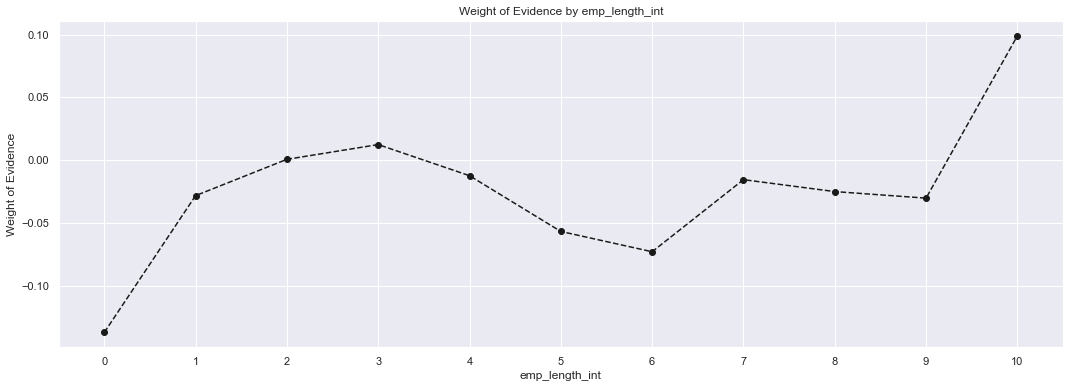

In [386]:
plot_by_woe(df_emp_length)

In [387]:
# We create the following categories: '0', '1', 2'- 4', '5 - 6', '7 - 9', '10'
# 0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### months_since_issue_d'

In [388]:
df_inputs_prepr['months_since_issue_d'].unique()

array([ 49.,  38.,  43.,  52.,  47.,  41.,  92.,  50.,  37.,  44.,  51.,
        62.,  59.,  53.,  36.,  46.,  58.,  66.,  54.,  84.,  63.,  60.,
       106.,  87.,  76.,  65.,  39.,  40.,  81.,  55.,  74.,  64.,  85.,
        57.,  42.,  72.,  56.,  68.,  48.,  77.,  45.,  69., 103.,  70.,
       108.,  78.,  86.,  75.,  67., 119.,  89.,  97.,  61.,  71., 105.,
        83.,  79.,  90.,  95., 100.,  82.,  96.,  73.,  93.,  88., 104.,
        98., 117.,  91.,  80.,  94., 124., 115.,  99., 118., 121., 109.,
       110., 120., 111., 116., 114., 107., 125., 102., 112., 123., 101.,
       122., 113., 126.])

In [389]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['months_since_issue_d_factor'] = pd.cut(df_inputs_prepr['months_since_issue_d'], 50)

In [390]:
df_months_issue_factor = woe_ordered_continuous(df_inputs_prepr, 'months_since_issue_d_factor', df_targets_prepr)
df_months_issue_factor

,months_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28104,0.939653,0.075340,26408.0,1696.0,0.079715,0.040624,0.674109,NaN,NaN,0.103198
1,"(37.8, 39.6]",39507,0.924469,0.105909,36523.0,2984.0,0.110248,0.071475,0.433392,0.015184,0.240717,0.103198
2,"(39.6, 41.4]",38460,0.913833,0.103102,35146.0,3314.0,0.106092,0.079379,0.290069,0.010637,0.143323,0.103198
3,"(41.4, 43.2]",28942,0.904499,0.077587,26178.0,2764.0,0.079021,0.066205,0.176955,0.009334,0.113114,0.103198
4,"(43.2, 45.0]",28451,0.898914,0.076270,25575.0,2876.0,0.077201,0.068888,0.113929,0.005585,0.063026,0.103198
5,"(45.0, 46.8]",12265,0.893600,0.032880,10960.0,1305.0,0.033084,0.031258,0.056764,0.005314,0.057166,0.103198
6,"(46.8, 48.6]",24613,0.895177,0.065982,22033.0,2580.0,0.066509,0.061798,0.073467,0.001578,0.016703,0.103198
7,"(48.6, 50.4]",23006,0.885421,0.061674,20370.0,2636.0,0.061489,0.063139,-0.026485,0.009756,0.099951,0.103198
8,"(50.4, 52.2]",20521,0.879489,0.055012,18048.0,2473.0,0.054480,0.059235,-0.083683,0.005932,0.057198,0.103198
9,"(52.2, 54.0]",18368,0.867160,0.049240,15928.0,2440.0,0.048080,0.058445,-0.195205,0.012329,0.111522,0.103198


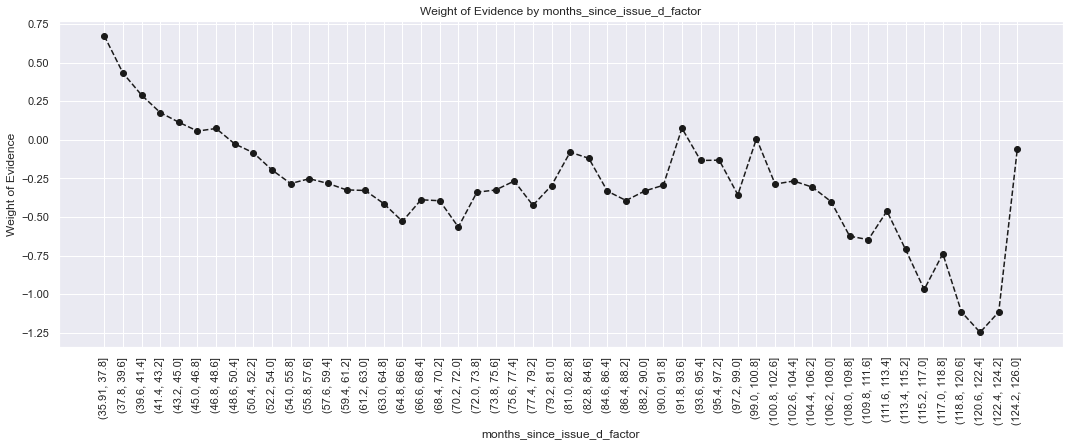

In [391]:
plot_by_woe(df_months_issue_factor,90)

The first, the second and the third catergoris differ significantly in term of weight of evidence from one another and from the following categories. We will keep them as the final categories for final model.

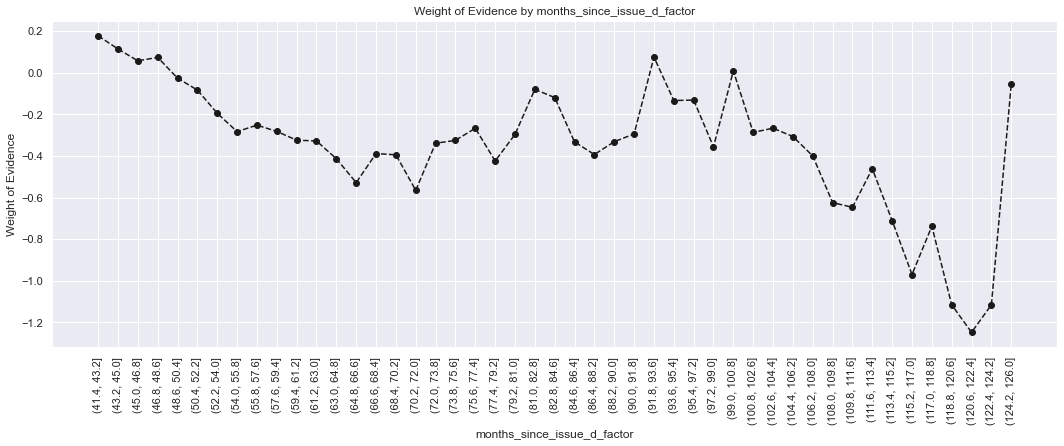

In [392]:
# Let's look more closely
plot_by_woe(df_months_issue_factor.iloc[3: , : ], 90)

We can easily group the months 42-48, 49-54, and 55-64 together since they share similar WoE values. However, due to low observations causing erratic fluctuations in the graph, it's advisable to consolidate all subsequent months into a single group. In this case, I suggest dividing at 84 months, creating two groups: 65-84 months and greater than 84 months.

In [393]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 54, 55 - 64, 65 - 84, > 84.
df_inputs_prepr['months_since_issue_d:<38'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['months_since_issue_d:38-39'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['months_since_issue_d:40-41'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['months_since_issue_d:42-48'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['months_since_issue_d:49-54'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(49, 55)), 1, 0)
df_inputs_prepr['months_since_issue_d:55-64'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(55, 65)), 1, 0)
df_inputs_prepr['months_since_issue_d:65-84'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['months_since_issue_d:>84'] = np.where(df_inputs_prepr['months_since_issue_d'].isin(range(85, int(df_inputs_prepr['months_since_issue_d'].max()))), 1, 0)

### int_rate

In [394]:
df_inputs_prepr['int_rate'].nunique()

504

In [395]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [396]:
df_int_rate = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_int_rate

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",799,0.964956,0.002142,771.0,28.0,0.002327,0.000671,1.244198,NaN,NaN,0.344567
1,"(5.833, 6.246]",8379,0.979592,0.022462,8208.0,171.0,0.024777,0.004096,1.799916,0.014636,0.555717,0.344567
2,"(6.246, 6.658]",7783,0.970448,0.020864,7553.0,230.0,0.022800,0.005509,1.420335,0.009143,0.379580,0.344567
3,"(6.658, 7.071]",1789,0.965344,0.004796,1727.0,62.0,0.005213,0.001485,1.255721,0.005105,0.164614,0.344567
4,"(7.071, 7.484]",3096,0.978682,0.008300,3030.0,66.0,0.009146,0.001581,1.755378,0.013338,0.499656,0.344567
5,"(7.484, 7.897]",12721,0.962739,0.034102,12247.0,474.0,0.036969,0.011354,1.180544,0.015943,0.574834,0.344567
6,"(7.897, 8.31]",9635,0.948210,0.025829,9136.0,499.0,0.027578,0.011952,0.836086,0.014529,0.344457,0.344567
7,"(8.31, 8.722]",6595,0.964064,0.017680,6358.0,237.0,0.019192,0.005677,1.218124,0.015854,0.382037,0.344567
8,"(8.722, 9.135]",9619,0.936376,0.025786,9007.0,612.0,0.027189,0.014659,0.617740,0.027688,0.600384,0.344567
9,"(9.135, 9.548]",6632,0.963359,0.017779,6389.0,243.0,0.019286,0.005820,1.197986,0.026984,0.580247,0.344567


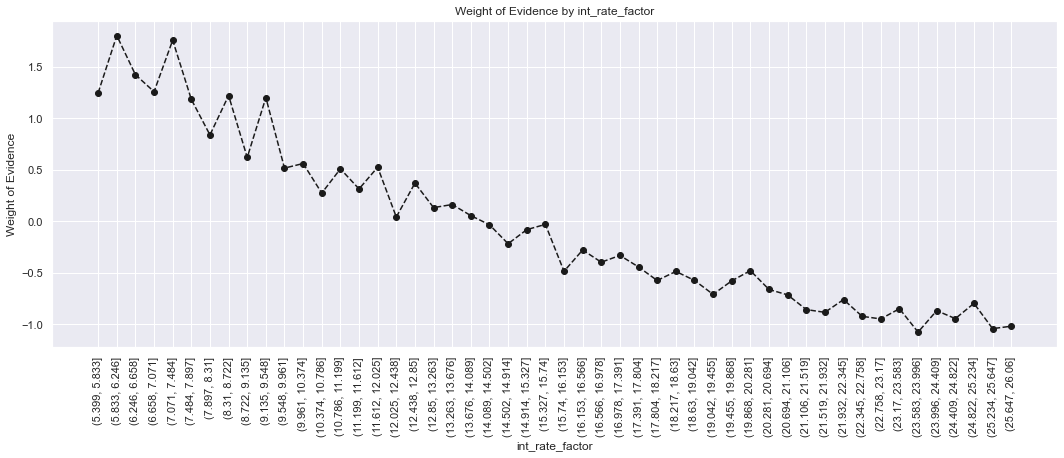

In [397]:
plot_by_woe(df_int_rate, 90)
# We plot the weight of evidence values.

In [398]:
# We will divide into those dummy variables: < 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

### funded_amnt

In [399]:
df_inputs_prepr['funded_amnt'].nunique()

1347

In [400]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

In [401]:
df_fund_amnt = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_fund_amnt

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1241,0.899275,0.003327,1116.0,125.0,0.003369,0.002994,0.117907,NaN,NaN,0.014687
1,"(1190.0, 1880.0]",3053,0.900426,0.008184,2749.0,304.0,0.008298,0.007282,0.130679,0.001151,0.012772,0.014687
2,"(1880.0, 2570.0]",5987,0.895440,0.016050,5361.0,626.0,0.016183,0.014994,0.076270,0.004986,0.054409,0.014687
3,"(2570.0, 3260.0]",7265,0.888369,0.019476,6454.0,811.0,0.019482,0.019426,0.002902,0.007071,0.073368,0.014687
4,"(3260.0, 3950.0]",4787,0.888657,0.012833,4254.0,533.0,0.012841,0.012767,0.005808,0.000288,0.002906,0.014687
5,"(3950.0, 4640.0]",9057,0.888374,0.024280,8046.0,1011.0,0.024288,0.024216,0.002950,0.000283,0.002858,0.014687
6,"(4640.0, 5330.0]",15888,0.892560,0.042592,14181.0,1707.0,0.042807,0.040887,0.045880,0.004187,0.042930,0.014687
7,"(5330.0, 6020.0]",17050,0.902053,0.045707,15380.0,1670.0,0.046426,0.040001,0.148959,0.009492,0.103079,0.014687
8,"(6020.0, 6710.0]",6897,0.881398,0.018489,6079.0,818.0,0.018350,0.019593,-0.065552,0.020655,0.214511,0.014687
9,"(6710.0, 7400.0]",11748,0.894876,0.031494,10513.0,1235.0,0.031735,0.029582,0.070256,0.013478,0.135808,0.014687


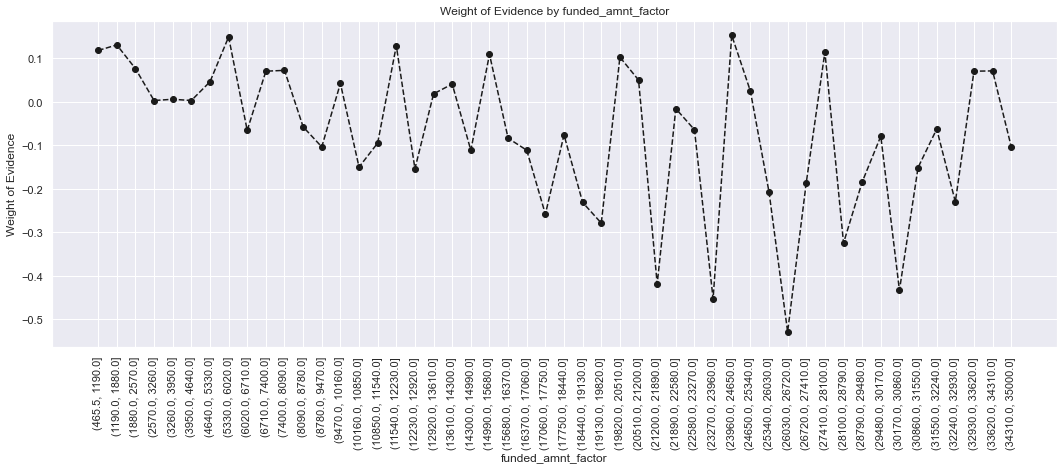

In [402]:
plot_by_woe(df_fund_amnt, 90)

It is notable to see that all variables are around a trend that is almost horizontal. There is no clear pattern of dependence between independent variables and weight of evidence. The IV value is also small (<0.02). These are sufficient reasons not to use this feature.

### months_since_earliest_cr_line

In [403]:
df_inputs_prepr['months_since_earliest_cr_line'].nunique()

515

In [404]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

In [405]:
df_months_since_earliest = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_months_since_earliest

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(72.486, 83.28]",843,0.903915,0.002260,762.0,81.0,0.002300,0.001940,0.170227,NaN,NaN,0.015823
1,"(83.28, 93.56]",1840,0.883696,0.004933,1626.0,214.0,0.004909,0.005126,-0.043368,0.020219,0.213595,0.015823
2,"(93.56, 103.84]",2373,0.856721,0.006362,2033.0,340.0,0.006137,0.008144,-0.282948,0.026974,0.239580,0.015823
3,"(103.84, 114.12]",3969,0.871252,0.010641,3458.0,511.0,0.010439,0.012240,-0.159194,0.014531,0.123754,0.015823
4,"(114.12, 124.4]",6671,0.864638,0.017884,5768.0,903.0,0.017412,0.021630,-0.216912,0.006614,0.057718,0.015823
5,"(124.4, 134.68]",8817,0.857661,0.023638,7562.0,1255.0,0.022828,0.030062,-0.275270,0.006977,0.058358,0.015823
6,"(134.68, 144.96]",10786,0.868626,0.028917,9369.0,1417.0,0.028283,0.033943,-0.182406,0.010965,0.092864,0.015823
7,"(144.96, 155.24]",12672,0.875395,0.033973,11093.0,1579.0,0.033487,0.037823,-0.121747,0.006769,0.060658,0.015823
8,"(155.24, 165.52]",14401,0.877647,0.038608,12639.0,1762.0,0.038155,0.042207,-0.100932,0.002253,0.020815,0.015823
9,"(165.52, 175.8]",16479,0.882942,0.044179,14550.0,1929.0,0.043923,0.046207,-0.050681,0.005295,0.050252,0.015823


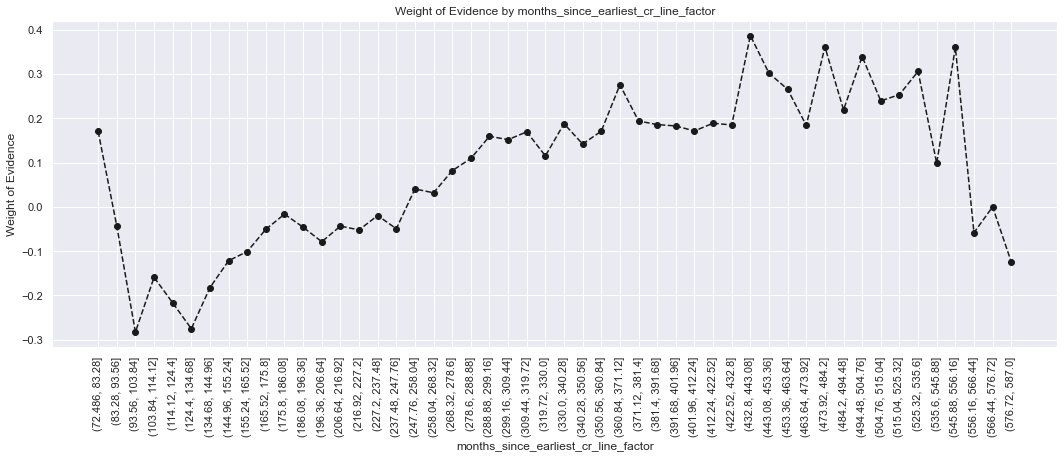

In [406]:
plot_by_woe(df_months_since_earliest, 90)

In [407]:
# We create the following categories:
# < 144, 145 - 165, # 166 - 248, # 249 - 268, # 269 - 361, # > 361
df_inputs_prepr['months_since_earliest_cr_line:<144'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(144)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:145-165'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(145, 166)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:166-248'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(166, 249)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:249-268'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(249, 269)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:269-361'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(269, 362)), 1, 0)
df_inputs_prepr['months_since_earliest_cr_line:>361'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(362, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)

### inq_last_6mths

In [408]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  5.,  3.,  4.,  7.,  6., 32.,  9.,  8., 12., 33.,
       10., 18., 15., 11., 24., 17., 19., 25., nan, 14., 28., 16., 13.,
       31., 27.])

In [409]:
df_inq_6mnths = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_inq_6mnths

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193277,0.906600,0.518162,175225.0,18052.0,0.528968,0.432414,0.201544,NaN,NaN,inf
1,1.0,104072,0.881111,0.279010,91699.0,12373.0,0.276820,0.296381,-0.068275,0.025489,0.269820,inf
2,2.0,46275,0.861415,0.124060,39862.0,6413.0,0.120335,0.153616,-0.244174,0.019696,0.175898,inf
3,3.0,20107,0.837420,0.053905,16838.0,3269.0,0.050830,0.078305,-0.432116,0.023996,0.187942,inf
4,4.0,5754,0.842197,0.015426,4846.0,908.0,0.014629,0.021750,-0.396605,0.004777,0.035510,inf
5,5.0,2199,0.820373,0.005895,1804.0,395.0,0.005446,0.009462,-0.552394,0.021824,0.155789,inf
6,6.0,940,0.787234,0.002520,740.0,200.0,0.002234,0.004791,-0.762937,0.033139,0.210543,inf
7,7.0,167,0.622754,0.000448,104.0,63.0,0.000314,0.001509,-1.570014,0.164480,0.807077,inf
8,8.0,98,0.622449,0.000263,61.0,37.0,0.000184,0.000886,-1.571314,0.000306,0.001300,inf
9,9.0,42,0.666667,0.000113,28.0,14.0,0.000085,0.000335,-1.378123,0.044218,0.193191,inf


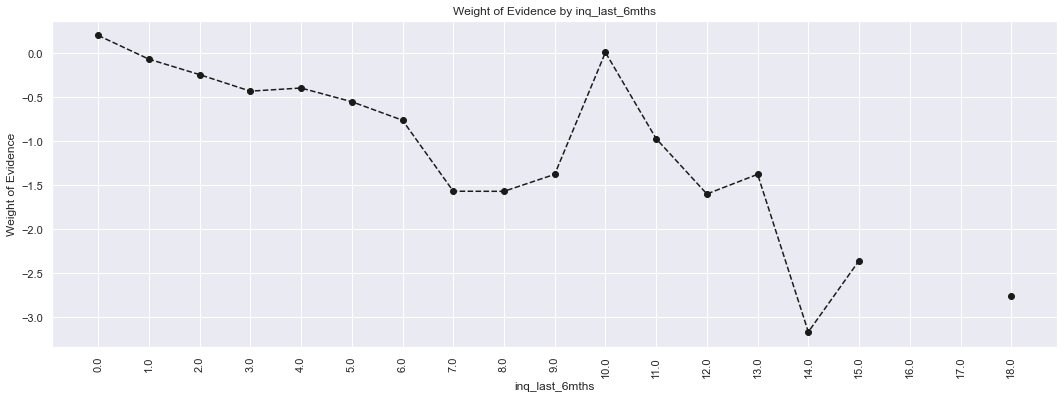

In [410]:
plot_by_woe(df_inq_6mnths, 90)

In [411]:
# Categories: 0, 1, 2-4, 5-6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 1), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 2) & (df_inputs_prepr['inq_last_6mths'] <= 4), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 5) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### open_acc

In [412]:
df_inputs_prepr['open_acc'].nunique()

61

In [413]:
df_open_acc = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_open_acc

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,0.428571,0.000019,3.0,4.0,0.000009,0.000096,-2.358952,NaN,NaN,inf
1,1.0,113,0.858407,0.000303,97.0,16.0,0.000293,0.000383,-0.269148,0.429836,2.089804,inf
2,2.0,1438,0.839360,0.003855,1207.0,231.0,0.003644,0.005533,-0.417794,0.019047,0.148647,inf
3,3.0,4378,0.867063,0.011737,3796.0,582.0,0.011459,0.013941,-0.196037,0.027702,0.221757,inf
4,4.0,10078,0.890752,0.027018,8977.0,1101.0,0.027100,0.026373,0.027177,0.023690,0.223214,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
57,61.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,62.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


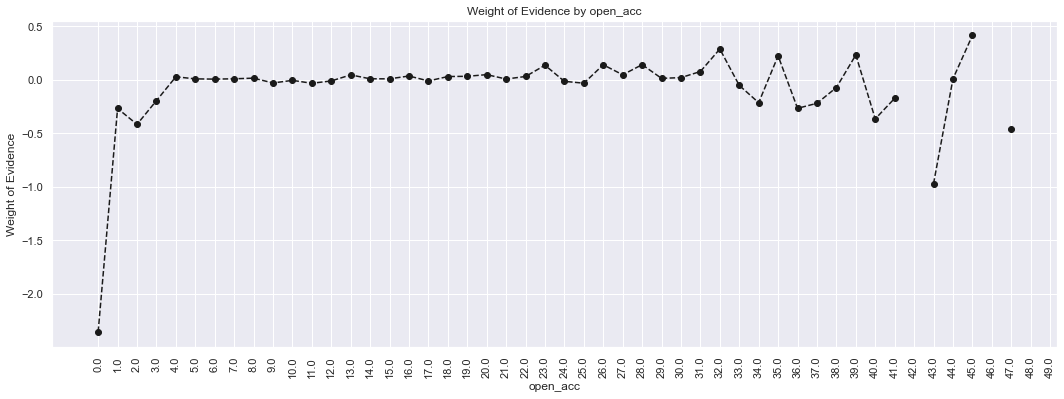

In [414]:
plot_by_woe(df_open_acc, 90)

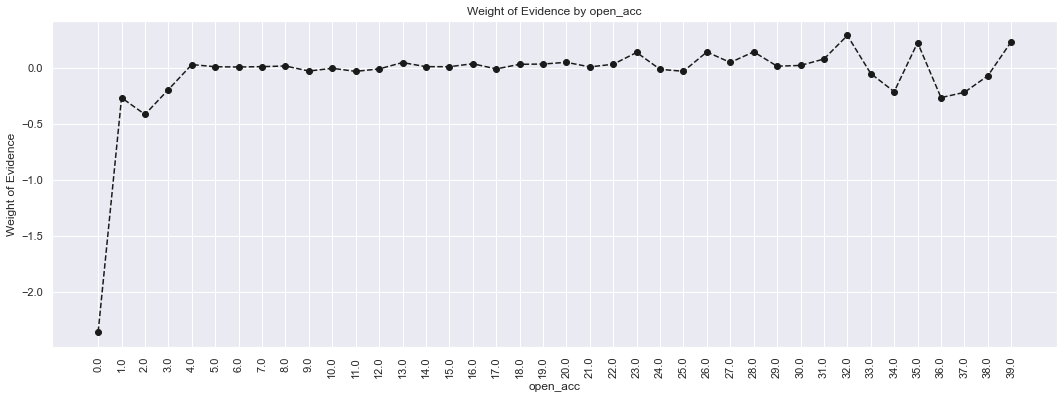

In [415]:
# Let's look more closely
plot_by_woe(df_open_acc.iloc[:40,:], 90)

In [416]:
# Categories: '0', '1-3', '4-12', '13-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-22'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### pub_rec

In [417]:
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  6.,  4.,  5., 18., 12., 10.,  8.,  7.,  9.,
       14., 15., 34., 11., 21., nan, 54., 49., 17., 40., 13.])

In [418]:
df_pub_rec = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_pub_rec

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323906,0.887183,0.868369,287364.0,36542.0,0.867493,0.875320,-0.008983,NaN,NaN,inf
1,1.0,42478,0.892956,0.113881,37931.0,4547.0,0.114506,0.108918,0.050031,0.005773,0.059014,inf
2,2.0,4470,0.894407,0.011984,3998.0,472.0,0.012069,0.011306,0.065301,0.001451,0.015269,inf
3,3.0,1299,0.913010,0.003483,1186.0,113.0,0.003580,0.002707,0.279684,0.018603,0.214383,inf
4,4.0,417,0.906475,0.001118,378.0,39.0,0.001141,0.000934,0.200063,0.006535,0.079621,inf
5,5.0,208,0.908654,0.000558,189.0,19.0,0.000571,0.000455,0.226038,0.002179,0.025975,inf
6,6.0,113,0.920354,0.000303,104.0,9.0,0.000314,0.000216,0.375896,0.011700,0.149858,inf
7,7.0,51,0.921569,0.000137,47.0,4.0,0.000142,0.000096,0.392583,0.001215,0.016687,inf
8,8.0,23,0.956522,0.000062,22.0,1.0,0.000066,0.000024,1.019773,0.034953,0.627189,inf
9,9.0,10,0.900000,0.000027,9.0,1.0,0.000027,0.000024,0.125955,0.056522,0.893818,inf


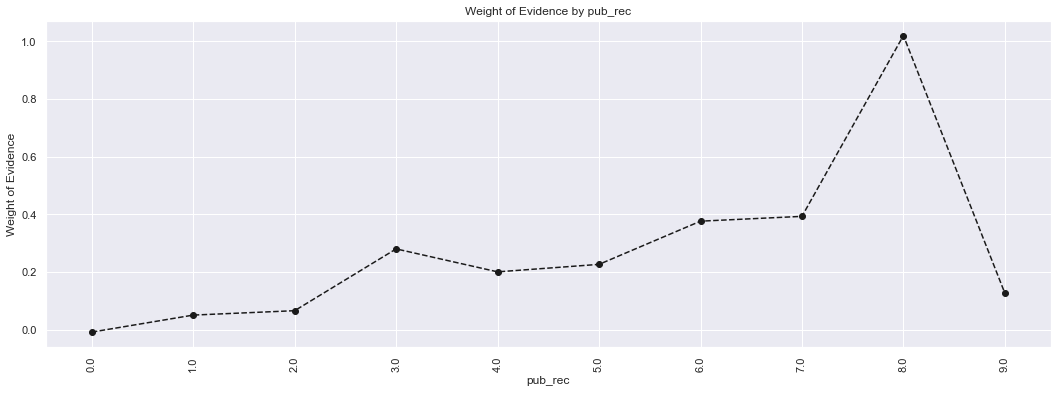

In [419]:
plot_by_woe(df_pub_rec, 90)

In [420]:
# Categories '0-2', '3-5', '>=6'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-5'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 5), 1, 0)
df_inputs_prepr['pub_rec:>=6'] = np.where((df_inputs_prepr['pub_rec'] >= 6), 1, 0)

### total_acc

In [421]:
df_inputs_prepr['total_acc'].nunique()

107

In [422]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [423]:
df_total_acc = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_total_acc

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.845, 4.1]",1636,0.844132,0.004386,1381.0,255.0,0.004169,0.006108,-0.381970,NaN,NaN,inf
1,"(4.1, 7.2]",8712,0.863866,0.023356,7526.0,1186.0,0.022719,0.028409,-0.223493,0.019734,0.158478,inf
2,"(7.2, 10.3]",18366,0.872917,0.049238,16032.0,2334.0,0.048397,0.055908,-0.144267,0.009051,0.079226,inf
3,"(10.3, 13.4]",28268,0.878414,0.075785,24831.0,3437.0,0.074960,0.082329,-0.093776,0.005496,0.050491,inf
4,"(13.4, 16.5]",35743,0.880508,0.095824,31472.0,4271.0,0.095008,0.102307,-0.074020,0.002094,0.019756,inf
5,"(16.5, 19.6]",39764,0.886254,0.106604,35241.0,4523.0,0.106385,0.108343,-0.018235,0.005746,0.055784,inf
6,"(19.6, 22.7]",40814,0.887171,0.109419,36209.0,4605.0,0.109308,0.110307,-0.009105,0.000917,0.009130,inf
7,"(22.7, 25.8]",39024,0.888376,0.104621,34668.0,4356.0,0.104656,0.104343,0.002993,0.001205,0.012098,inf
8,"(25.8, 28.9]",34746,0.894434,0.093152,31078.0,3668.0,0.093818,0.087863,0.065584,0.006058,0.062591,inf
9,"(28.9, 32.0]",38607,0.895097,0.103503,34557.0,4050.0,0.104320,0.097013,0.072623,0.000663,0.007040,inf


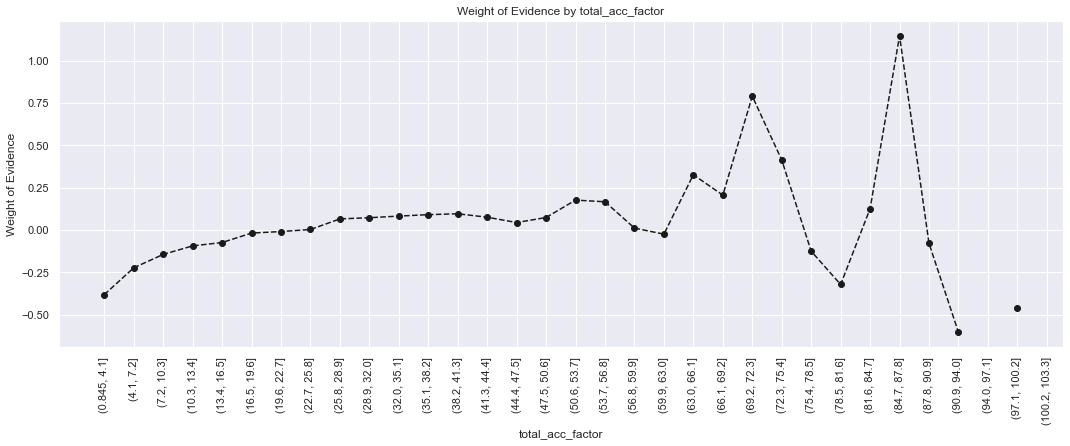

In [424]:
plot_by_woe(df_total_acc, 90)

In [425]:
# Categories: '<=26', '27-51', '>51'
df_inputs_prepr['total_acc:<=26'] = np.where((df_inputs_prepr['total_acc'] <= 26), 1, 0)
df_inputs_prepr['total_acc:27-51'] = np.where((df_inputs_prepr['total_acc'] >= 27) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:> 51'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

### total_rev_hi_lim

In [426]:
df_inputs_prepr['total_rev_hi_lim'].nunique()

12677

In [427]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_total_rev_hi_lim= woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_total_rev_hi_lim

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19369,0.862667,0.051924,16709.0,2660.0,0.050438,0.063714,-0.233664,NaN,NaN,inf
1,"(5000.0, 9999.999]",52637,0.873454,0.141107,45976.0,6661.0,0.138783,0.159549,-0.139436,0.010787,0.094229,inf
2,"(9999.999, 14999.998]",59500,0.877630,0.159505,52219.0,7281.0,0.157628,0.174399,-0.101107,0.004176,0.038328,inf
3,"(14999.998, 19999.998]",51389,0.875032,0.137762,44967.0,6422.0,0.135738,0.153824,-0.125086,0.002599,0.023979,inf
4,"(19999.998, 24999.997]",41655,0.884504,0.111667,36844.0,4811.0,0.111217,0.115236,-0.035498,0.009472,0.089589,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [428]:
len(df_total_rev_hi_lim[df_total_rev_hi_lim['n_obs'] >100]['total_rev_hi_lim_factor'])

37

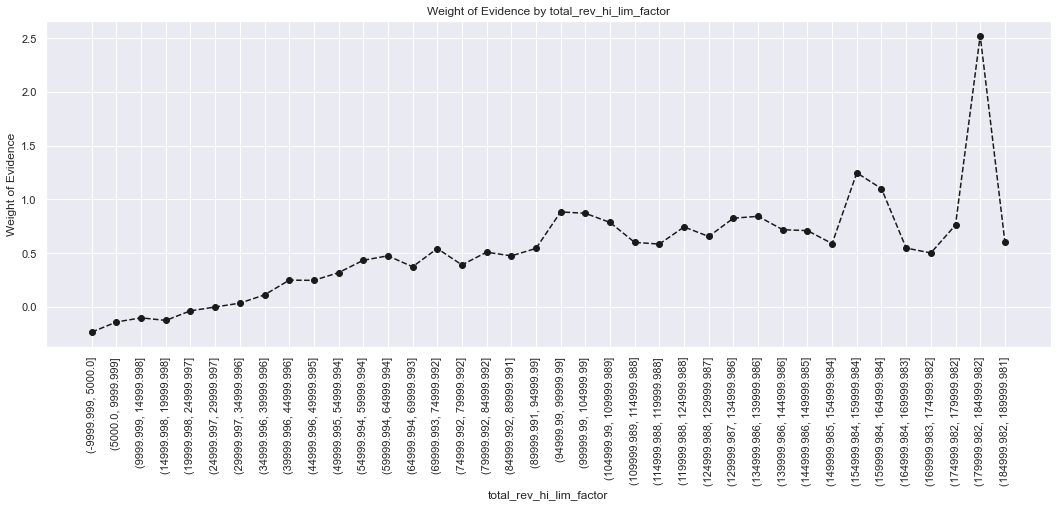

In [429]:
# There only 37 groups which have more than 100 observations.
plot_by_woe(df_total_rev_hi_lim.iloc[: 38, : ], 90)

In [430]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### installment

In [431]:
df_inputs_prepr['installment'].nunique()

51357

In [432]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [433]:
df_installment = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_installment

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1830,0.898907,0.004906,1645.0,185.0,0.004966,0.004431,0.113854,NaN,NaN,0.013611
1,"(43.556, 71.443]",4866,0.897041,0.013045,4365.0,501.0,0.013176,0.012000,0.093482,0.001866,0.020372,0.013611
2,"(71.443, 99.329]",6805,0.893902,0.018243,6083.0,722.0,0.018362,0.017294,0.059943,0.003139,0.033539,0.013611
3,"(99.329, 127.216]",9121,0.888280,0.024451,8102.0,1019.0,0.024457,0.024408,0.002004,0.005622,0.057939,0.013611
4,"(127.216, 155.102]",10184,0.893264,0.027301,9097.0,1087.0,0.027460,0.026037,0.053238,0.004984,0.051234,0.013611
5,"(155.102, 182.988]",16708,0.894841,0.044790,14951.0,1757.0,0.045131,0.042085,0.069885,0.001577,0.016647,0.013611
6,"(182.988, 210.875]",16946,0.901983,0.045428,15285.0,1661.0,0.046139,0.039785,0.148167,0.007142,0.078282,0.013611
7,"(210.875, 238.761]",15015,0.896770,0.040252,13465.0,1550.0,0.040645,0.037127,0.090553,0.005213,0.057613,0.013611
8,"(238.761, 266.648]",18839,0.897659,0.050503,16911.0,1928.0,0.051048,0.046181,0.100196,0.000889,0.009642,0.013611
9,"(266.648, 294.534]",20151,0.889484,0.054020,17924.0,2227.0,0.054105,0.053343,0.014200,0.008175,0.085996,0.013611


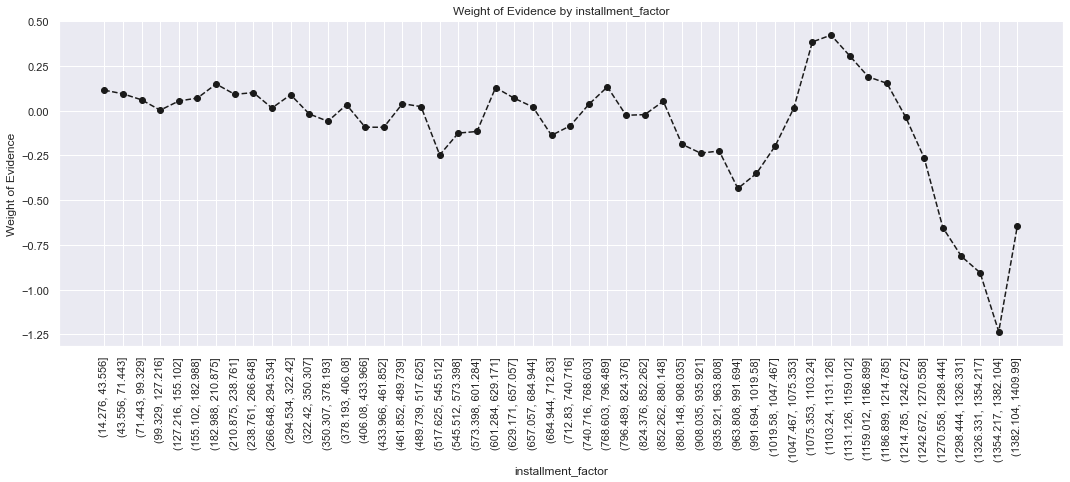

In [434]:
plot_by_woe(df_installment, 90)

This feature has the same situation as the fund_ammount, so we will not use it for the final model

### annual_inc

In [435]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inc = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_inc

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",356741,0.886380,0.956349,316208.0,40533.0,0.954518,0.970874,-0.016990,NaN,NaN,inf
1,"(151858.08, 301820.16]",14688,0.924020,0.039375,13572.0,1116.0,0.040969,0.026731,0.426985,0.037640,0.443974,inf
2,"(301820.16, 451782.24]",1076,0.935874,0.002885,1007.0,69.0,0.003040,0.001653,0.609351,0.011854,0.182366,inf
3,"(451782.24, 601744.32]",300,0.936667,0.000804,281.0,19.0,0.000848,0.000455,0.622642,0.000793,0.013291,inf
4,"(601744.32, 751706.4]",89,0.932584,0.000239,83.0,6.0,0.000251,0.000144,0.555808,0.004082,0.066835,inf
5,"(751706.4, 901668.48]",62,0.919355,0.000166,57.0,5.0,0.000172,0.000120,0.362340,0.013229,0.193468,inf
6,"(901668.48, 1051630.56]",24,0.958333,0.000064,23.0,1.0,0.000069,0.000024,1.064221,0.038978,0.701881,inf
7,"(1051630.56, 1201592.64]",15,1.000000,0.000040,15.0,0.0,0.000045,0.000000,inf,0.041667,inf,inf
8,"(1201592.64, 1351554.72]",9,1.000000,0.000024,9.0,0.0,0.000027,0.000000,inf,0.000000,NaN,inf
9,"(1351554.72, 1501516.8]",3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.000000,NaN,inf


We can see that the observations focuses on annual salaries below 150K, only a very small number of people has a annual salaries upper 600K. As a result, we decide too look first in the subset of salaries below 150K.

In [436]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 150000, : ]

In [437]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_inc_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_inc_temp

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/3037425131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1747.896, 4858.08]",19,0.736842,0.000053,14.0,5.0,0.000044,0.000123,-1.024568,NaN,NaN,0.048727
1,"(4858.08, 7820.16]",40,0.850000,0.000112,34.0,6.0,0.000108,0.000148,-0.319586,0.113158,0.704982,0.048727
2,"(7820.16, 10782.24]",342,0.839181,0.000959,287.0,55.0,0.000908,0.001357,-0.402038,0.010819,0.082452,0.048727
3,"(10782.24, 13744.32]",683,0.840410,0.001915,574.0,109.0,0.001816,0.002690,-0.392905,0.001229,0.009132,0.048727
4,"(13744.32, 16706.4]",1356,0.842183,0.003803,1142.0,214.0,0.003613,0.005281,-0.379627,0.001773,0.013279,0.048727
5,"(16706.4, 19668.48]",1876,0.840618,0.005261,1577.0,299.0,0.004989,0.007379,-0.391351,0.001565,0.011724,0.048727
6,"(19668.48, 22630.56]",3559,0.841248,0.009980,2994.0,565.0,0.009472,0.013944,-0.386647,0.000629,0.004704,0.048727
7,"(22630.56, 25592.64]",6423,0.856609,0.018012,5502.0,921.0,0.017407,0.022730,-0.266780,0.015362,0.119867,0.048727
8,"(25592.64, 28554.72]",5722,0.847431,0.016046,4849.0,873.0,0.015341,0.021545,-0.339595,0.009178,0.072815,0.048727
9,"(28554.72, 31516.8]",10361,0.860535,0.029055,8916.0,1445.0,0.028208,0.035661,-0.234449,0.013104,0.105146,0.048727


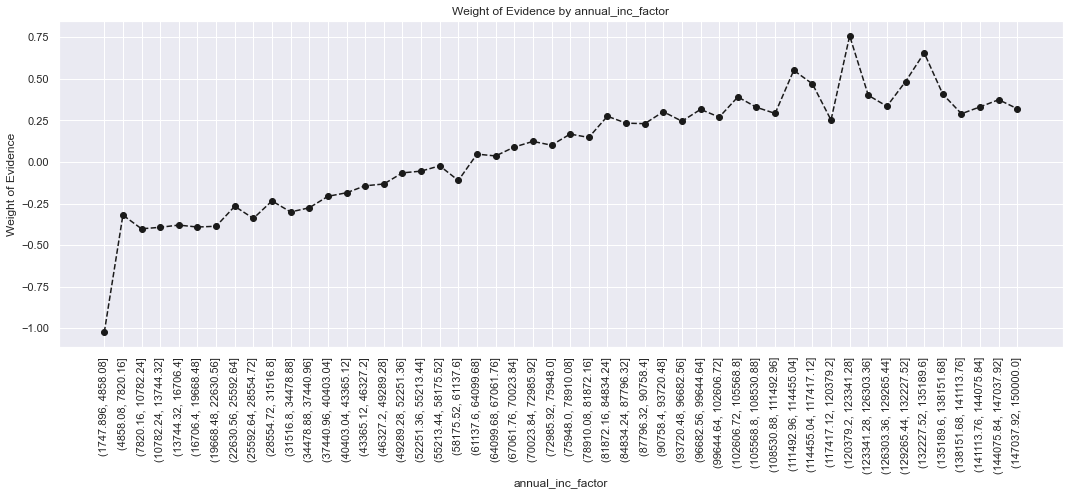

In [438]:
plot_by_woe(df_inc_temp, 90)

In [439]:
# Category
# '<23K', '23K-37K', '37K-49K', '49K-61K', '61K-81K', '81K-102K', '102K-120K', '120K-150K', '>150K'
df_inputs_prepr['annual_inc:<23K'] = np.where((df_inputs_prepr['annual_inc'] <= 23000), 1, 0)
df_inputs_prepr['annual_inc:24K-37K'] = np.where((df_inputs_prepr['annual_inc'] > 23000) & (df_inputs_prepr['annual_inc'] <= 37000), 1, 0)
df_inputs_prepr['annual_inc:37K-49K'] = np.where((df_inputs_prepr['annual_inc'] > 37000) & (df_inputs_prepr['annual_inc'] <= 49000), 1, 0)
df_inputs_prepr['annual_inc:49K-61K'] = np.where((df_inputs_prepr['annual_inc'] > 49000) & (df_inputs_prepr['annual_inc'] <= 61000), 1, 0)
df_inputs_prepr['annual_inc:61K-81K'] = np.where((df_inputs_prepr['annual_inc'] > 61000) & (df_inputs_prepr['annual_inc'] <= 81000), 1, 0)
df_inputs_prepr['annual_inc:81K-102K'] = np.where((df_inputs_prepr['annual_inc'] > 81000) & (df_inputs_prepr['annual_inc'] <= 102000), 1, 0)
df_inputs_prepr['annual_inc:102K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 102000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-150K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 150000), 1, 0)
df_inputs_prepr['annual_inc:>150K'] = np.where((df_inputs_prepr['annual_inc'] > 150000), 1, 0)

### months_since_last_delinq

In [440]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_mnths_last_delinq = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_mnths_last_delinq

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/3212006966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5307,0.868099,0.030725,4607.0,700.0,0.030007,0.036472,-0.195099,NaN,NaN,inf
1,"(3.76, 7.52]",11050,0.882986,0.063975,9757.0,1293.0,0.063551,0.067368,-0.058330,0.014888,0.136768,inf
2,"(7.52, 11.28]",13370,0.891324,0.077407,11917.0,1453.0,0.077620,0.075705,0.024985,0.008337,0.083316,inf
3,"(11.28, 15.04]",13159,0.883578,0.076186,11627.0,1532.0,0.075731,0.079821,-0.052594,0.007746,0.077580,inf
4,"(15.04, 18.8]",9369,0.891130,0.054243,8349.0,1020.0,0.054380,0.053144,0.022989,0.007553,0.075583,inf
5,"(18.8, 22.56]",11618,0.887933,0.067264,10316.0,1302.0,0.067192,0.067837,-0.009556,0.003198,0.032545,inf
6,"(22.56, 26.32]",10860,0.892173,0.062875,9689.0,1171.0,0.063108,0.061012,0.033783,0.004241,0.043339,inf
7,"(26.32, 30.08]",10572,0.891411,0.061208,9424.0,1148.0,0.061382,0.059813,0.025888,0.000762,0.007895,inf
8,"(30.08, 33.84]",7639,0.894358,0.044227,6832.0,807.0,0.044499,0.042047,0.056699,0.002947,0.030811,inf
9,"(33.84, 37.6]",9799,0.895091,0.056732,8771.0,1028.0,0.057129,0.053561,0.064485,0.000733,0.007787,inf


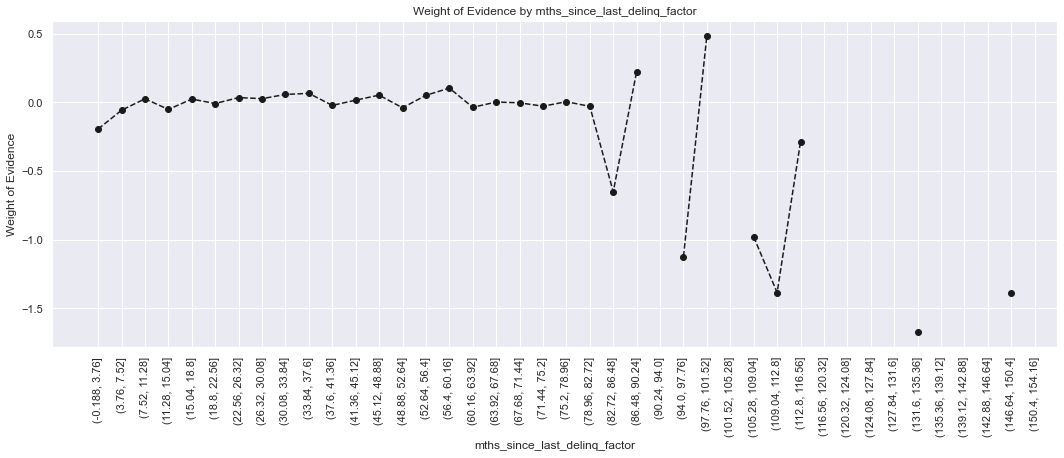

In [441]:
plot_by_woe(df_mnths_last_delinq, 90)

Since months_since_last_delinq has a lot of NaN values, we will create missing dummy variable. 
- =1 when the value is missing
- =0 when the value is not missing

In [442]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)

In [443]:
# Category
# '0-3','4-37','38-60','>60'
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-37'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 37), 1, 0)
df_inputs_prepr['mths_since_last_delinq:38-60'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 38) & (df_inputs_prepr['mths_since_last_delinq'] <= 60), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=61'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### dti

In [444]:
df_inputs_prepr['dti'].nunique()

3997

In [445]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_dti = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_dti

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",736,0.872283,0.001973,642.0,94.0,0.001938,0.002252,-0.149992,NaN,NaN,0.029669
1,"(0.4, 0.8]",795,0.910692,0.002131,724.0,71.0,0.002185,0.001701,0.250826,0.038409,0.400818,0.029669
2,"(0.8, 1.2]",928,0.899784,0.002488,835.0,93.0,0.002521,0.002228,0.123547,0.010907,0.127279,0.029669
3,"(1.2, 1.6]",1066,0.891182,0.002858,950.0,116.0,0.002868,0.002779,0.031586,0.008602,0.091960,0.029669
4,"(1.6, 2.0]",1177,0.899745,0.003155,1059.0,118.0,0.003197,0.002826,0.123110,0.008563,0.091524,0.029669
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",212,0.830189,0.000568,176.0,36.0,0.000531,0.000862,-0.484320,0.081945,0.753008,0.029669
96,"(38.39, 38.79]",187,0.871658,0.000501,163.0,24.0,0.000492,0.000575,-0.155589,0.041469,0.328731,0.029669
97,"(38.79, 39.19]",193,0.860104,0.000517,166.0,27.0,0.000501,0.000647,-0.255134,0.011554,0.099545,0.029669
98,"(39.19, 39.59]",187,0.909091,0.000501,170.0,17.0,0.000513,0.000407,0.231300,0.048987,0.486434,0.029669


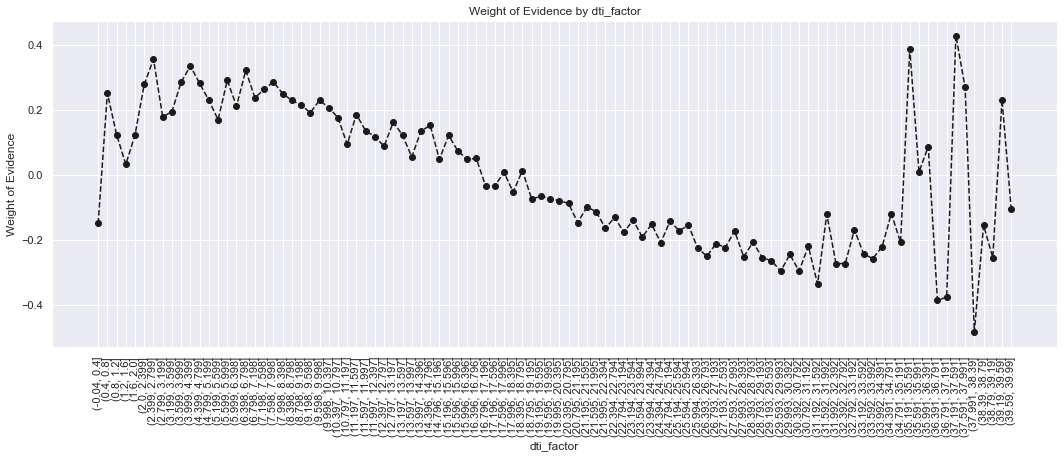

In [446]:
plot_by_woe(df_dti, 90)

We can notice that higher DTI ratio percentage indicates more existing debt burden and higher risk for a new loan approval. This trend is quite accurate until the point 35%, with the groups vary greatly because of low observations. As a result, we will focus on the subset of dti below 35%.

In [447]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [448]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_dti_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_dti_temp

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/3817451549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1342,0.887481,0.003625,1191.0,151.0,0.003623,0.003646,-0.006467,NaN,NaN,0.028493
1,"(0.7, 1.4]",1670,0.897006,0.004511,1498.0,172.0,0.004557,0.004153,0.092655,0.009525,0.099123,0.028493
2,"(1.4, 2.1]",2029,0.904386,0.005481,1835.0,194.0,0.005582,0.004685,0.175205,0.007380,0.082550,0.028493
3,"(2.1, 2.8]",2569,0.913585,0.006940,2347.0,222.0,0.007139,0.005361,0.286480,0.009199,0.111274,0.028493
4,"(2.8, 3.5]",3128,0.906969,0.008450,2837.0,291.0,0.008629,0.007027,0.205443,0.006616,0.081037,0.028493
5,"(3.5, 4.2]",3831,0.914122,0.010349,3502.0,329.0,0.010652,0.007944,0.293296,0.007152,0.087853,0.028493
6,"(4.2, 4.9]",4551,0.912327,0.012294,4152.0,399.0,0.012629,0.009635,0.270648,0.001795,0.022648,0.028493
7,"(4.9, 5.6]",5280,0.906061,0.014264,4784.0,496.0,0.014552,0.011977,0.194720,0.006266,0.075928,0.028493
8,"(5.6, 6.3]",5959,0.910555,0.016098,5426.0,533.0,0.016504,0.012870,0.248700,0.004495,0.053980,0.028493
9,"(6.3, 7.0]",6569,0.912924,0.017746,5997.0,572.0,0.018241,0.013812,0.278139,0.002369,0.029440,0.028493


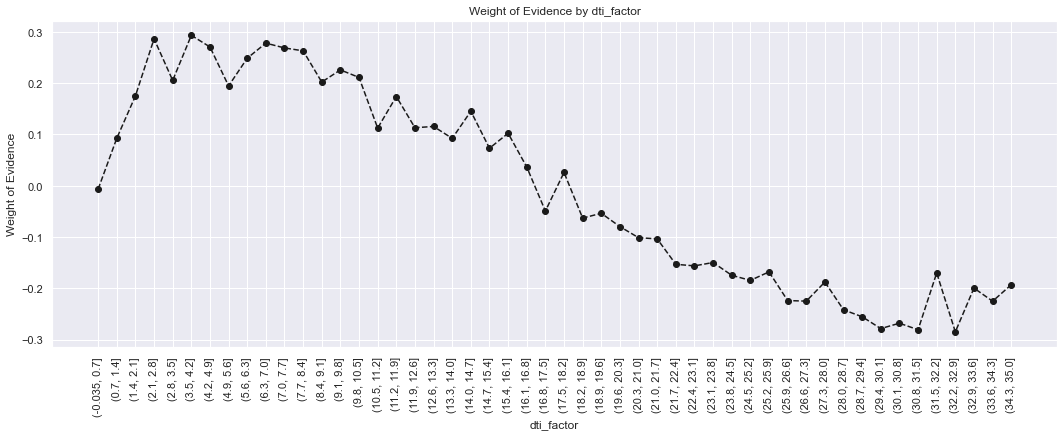

In [449]:
plot_by_woe(df_dti_temp, 90)

In [450]:
# Category
# '<2.1','2.1-4.9','4.9-8.4','8.4-10.5','10.5-16.1','16.1-20.3','20.3-21.7','21.7-23.8','23.8-25.9','25.9-28','28-35','>35'
df_inputs_prepr['dti:<=2.1'] = np.where((df_inputs_prepr['dti'] <= 2.1), 1, 0)
df_inputs_prepr['dti:2.1-4.9'] = np.where((df_inputs_prepr['dti'] > 2.1) & (df_inputs_prepr['dti'] <= 4.9), 1, 0)
df_inputs_prepr['dti:4.9-8.4'] = np.where((df_inputs_prepr['dti'] > 4.9) & (df_inputs_prepr['dti'] <= 8.4), 1, 0)
df_inputs_prepr['dti:8.4-10.5'] = np.where((df_inputs_prepr['dti'] > 8.4) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-23.8'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 23.8), 1, 0)
df_inputs_prepr['dti:23.8-25.9'] = np.where((df_inputs_prepr['dti'] > 23.8) & (df_inputs_prepr['dti'] <= 25.9), 1, 0)
df_inputs_prepr['dti:25.9-28'] = np.where((df_inputs_prepr['dti'] > 25.9) & (df_inputs_prepr['dti'] <= 28), 1, 0)
df_inputs_prepr['dti:28-35'] = np.where((df_inputs_prepr['dti'] > 28) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

### total_pymnt

In [451]:
df_inputs_prepr['total_pymnt'].nunique()

288378

In [452]:
df_inputs_prepr['total_pymnt_factor'] = pd.cut(df_inputs_prepr['total_pymnt'], 50)
df_total_pymnt = woe_ordered_continuous(df_inputs_prepr, 'total_pymnt_factor' , df_targets_prepr)
df_total_pymnt

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-57.778, 1155.552]",4689,0.440179,0.012570,2064.0,2625.0,0.006230,0.062876,-2.311720,NaN,NaN,inf
1,"(1155.552, 2311.103]",13774,0.668796,0.036925,9212.0,4562.0,0.027807,0.109272,-1.368540,0.228617,0.943181,inf
2,"(2311.103, 3466.655]",22166,0.763106,0.059422,16915.0,5251.0,0.051060,0.125775,-0.901503,0.094309,0.467036,inf
3,"(3466.655, 4622.206]",27957,0.821082,0.074946,22955.0,5002.0,0.069292,0.119811,-0.547587,0.057977,0.353916,inf
4,"(4622.206, 5777.758]",31014,0.858064,0.083141,26612.0,4402.0,0.080331,0.105440,-0.271982,0.036982,0.275605,inf
5,"(5777.758, 6933.31]",30423,0.880354,0.081557,26783.0,3640.0,0.080847,0.087188,-0.075502,0.022290,0.196480,inf
6,"(6933.31, 8088.861]",27689,0.891762,0.074228,24692.0,2997.0,0.074535,0.071786,0.037582,0.011408,0.113084,inf
7,"(8088.861, 9244.413]",24920,0.899478,0.066805,22415.0,2505.0,0.067662,0.060001,0.120156,0.007716,0.082574,inf
8,"(9244.413, 10399.964]",21849,0.910705,0.058572,19898.0,1951.0,0.060064,0.046732,0.250992,0.011227,0.130836,inf
9,"(10399.964, 11555.516]",22891,0.925735,0.061365,21191.0,1700.0,0.063967,0.040720,0.451663,0.015030,0.200671,inf


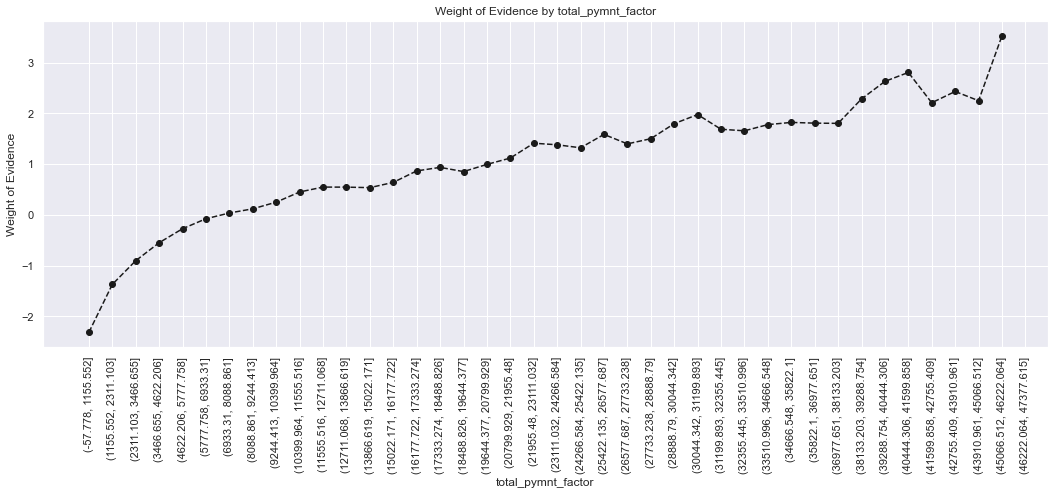

In [453]:
plot_by_woe(df_total_pymnt, 90)

In [454]:
# Category
# '<6K', '6K-11K', '11K-16K', '16K-21K', '21K-26K', '26K-31K', '31K-38K', '>38K'
df_inputs_prepr['total_pymnt:<=6K'] = np.where((df_inputs_prepr['total_pymnt'] <= 6000), 1, 0)
df_inputs_prepr['total_pymnt:6K-11K'] = np.where((df_inputs_prepr['total_pymnt'] > 6000) & (df_inputs_prepr['total_pymnt'] <= 11000), 1, 0)
df_inputs_prepr['total_pymnt:11K-16K'] = np.where((df_inputs_prepr['total_pymnt'] > 11000) & (df_inputs_prepr['total_pymnt'] <= 16000), 1, 0)
df_inputs_prepr['total_pymnt:16K-21K'] = np.where((df_inputs_prepr['total_pymnt'] > 16000) & (df_inputs_prepr['total_pymnt'] <= 21000), 1, 0)
df_inputs_prepr['total_pymnt:21K-26K'] = np.where((df_inputs_prepr['total_pymnt'] > 21000) & (df_inputs_prepr['total_pymnt'] <= 26000), 1, 0)
df_inputs_prepr['total_pymnt:26K-31K'] = np.where((df_inputs_prepr['total_pymnt'] > 26000) & (df_inputs_prepr['total_pymnt'] <= 31000), 1, 0)
df_inputs_prepr['total_pymnt:31K-38K'] = np.where((df_inputs_prepr['total_pymnt'] > 31000) & (df_inputs_prepr['total_pymnt'] <= 38000), 1, 0)
df_inputs_prepr['total_pymnt:>38K'] = np.where((df_inputs_prepr['total_pymnt'] > 38000), 1, 0)

### last_pymnt_amnt

In [455]:
df_inputs_prepr['last_pymnt_amnt'].nunique()

166739

In [456]:
df_inputs_prepr['last_pymnt_amnt_factor'] = pd.cut(df_inputs_prepr['last_pymnt_amnt'], 50)
df_last_pymnt = woe_ordered_continuous(df_inputs_prepr, 'last_pymnt_amnt_factor' , df_targets_prepr)
df_last_pymnt

,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-36.234, 724.689]",224882,0.840276,0.602856,188963.0,35919.0,0.570404,0.860356,-0.411001,NaN,NaN,inf
1,"(724.689, 1449.378]",38154,0.858573,0.102282,32758.0,5396.0,0.098883,0.129249,-0.267796,0.018297,0.143204,inf
2,"(1449.378, 2174.066]",6914,0.962829,0.018535,6657.0,257.0,0.020095,0.006156,1.183063,0.104256,1.450859,inf
3,"(2174.066, 2898.755]",6879,0.990842,0.018441,6816.0,63.0,0.020575,0.001509,2.612608,0.028013,1.429545,inf
4,"(2898.755, 3623.444]",6876,0.996364,0.018433,6851.0,25.0,0.020680,0.000599,3.541989,0.005522,0.929381,inf
5,"(3623.444, 4348.133]",6993,0.997712,0.018747,6977.0,16.0,0.021061,0.000383,4.006500,0.001348,0.464512,inf
6,"(4348.133, 5072.822]",6857,0.997812,0.018382,6842.0,15.0,0.020653,0.000359,4.051500,0.000100,0.045000,inf
7,"(5072.822, 5797.51]",6107,0.999345,0.016371,6103.0,4.0,0.018423,0.000096,5.258956,0.001533,1.207456,inf
8,"(5797.51, 6522.199]",5801,0.999138,0.015551,5796.0,5.0,0.017496,0.000120,4.984200,0.000207,0.274756,inf
9,"(6522.199, 7246.888]",5382,0.998885,0.014428,5376.0,6.0,0.016228,0.000144,4.726655,0.000253,0.257545,inf


In [457]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['last_pymnt_amnt'] <15000,:]

In [458]:
df_inputs_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(df_inputs_prepr_temp['last_pymnt_amnt'], 15)
df_last_pymnt_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'last_pymnt_amnt_factor' , df_targets_prepr[df_inputs_prepr_temp.index])
df_last_pymnt_temp

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/3811041085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(df_inputs_prepr_temp['last_pymnt_amnt'], 15)


,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-15.0, 999.99]",251323,0.841511,0.713435,211491.0,39832.0,0.681047,0.954426,-0.337478,NaN,NaN,1.303371
1,"(999.99, 1999.98]",16963,0.900725,0.048153,15279.0,1684.0,0.049202,0.040351,0.198317,0.059214,0.535796,1.303371
2,"(1999.98, 2999.97]",9501,0.987054,0.026971,9378.0,123.0,0.030199,0.002947,2.326947,0.086329,2.128630,1.303371
3,"(2999.97, 3999.96]",9527,0.997481,0.027044,9503.0,24.0,0.030602,0.000575,3.974319,0.010427,1.647372,1.303371
4,"(3999.96, 4999.95]",9512,0.997372,0.027002,9487.0,25.0,0.030550,0.000599,3.931812,0.000109,0.042507,1.303371
5,"(4999.95, 5999.94]",8571,0.998950,0.024331,8562.0,9.0,0.027572,0.000216,4.850874,0.001578,0.919063,1.303371
6,"(5999.94, 6999.93]",7633,0.999345,0.021668,7628.0,5.0,0.024564,0.000120,5.323153,0.000395,0.472279,1.303371
7,"(6999.93, 7999.92]",6930,0.998990,0.019672,6923.0,7.0,0.022294,0.000168,4.889704,0.000355,0.433449,1.303371
8,"(7999.92, 8999.91]",6189,0.999192,0.017569,6184.0,5.0,0.019914,0.000120,5.113293,0.000202,0.223588,1.303371
9,"(8999.91, 9999.9]",5682,0.999296,0.016130,5678.0,4.0,0.018284,0.000096,5.251070,0.000104,0.137777,1.303371


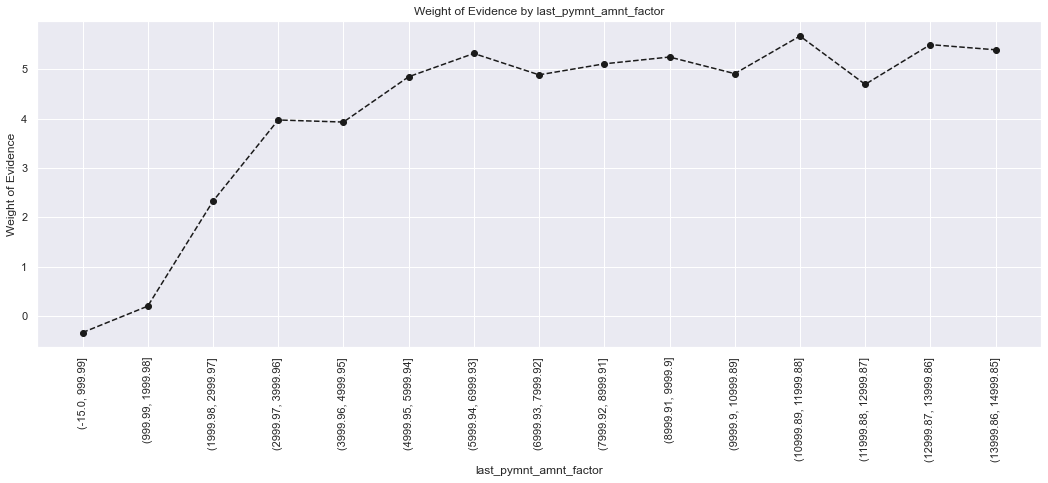

In [459]:
plot_by_woe(df_last_pymnt_temp,90)

We will discard this feature due to very high IV value.

In [460]:
# category
# '<300','300-600','600-1000','1000-1500','1500-2000','2000-2700','2700-5000','5000-10000','10000-15000','>15000'
# df_inputs_prepr['last_pymnt_amnt:<=300'] = np.where((df_inputs_prepr['last_pymnt_amnt'] <= 300), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:300-600'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 300) & (df_inputs_prepr['last_pymnt_amnt'] <= 600), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:600-1000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 600) & (df_inputs_prepr['last_pymnt_amnt'] <= 1000), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:1000-1500'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 1000) & (df_inputs_prepr['last_pymnt_amnt'] <= 1500), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:1500-2000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 1500) & (df_inputs_prepr['last_pymnt_amnt'] <= 2000), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:2000-2700'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 2000) & (df_inputs_prepr['last_pymnt_amnt'] <= 2700), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:2700-5000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 2700) & (df_inputs_prepr['last_pymnt_amnt'] <= 5000), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:5000-10000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 5000) & (df_inputs_prepr['last_pymnt_amnt'] <= 10000), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:10000-15000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 10000) & (df_inputs_prepr['last_pymnt_amnt'] <= 15000), 1, 0)
# df_inputs_prepr['last_pymnt_amnt:>15000'] = np.where((df_inputs_prepr['last_pymnt_amnt'] > 15000), 1, 0)

### out_prncp

In [461]:
df_inputs_prepr['out_prncp'].nunique()

112868

In [462]:
df_inputs_prepr['out_prncp_factor'] = pd.cut(df_inputs_prepr['out_prncp'], 25)
df_out_prncp = woe_ordered_continuous(df_inputs_prepr, 'out_prncp_factor' , df_targets_prepr)
df_out_prncp

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-32.16, 1286.415]",196698,0.822988,0.527301,161880.0,34818.0,0.488652,0.833984,-0.534565,NaN,NaN,0.589908
1,"(1286.415, 2572.83]",19781,0.972347,0.053028,19234.0,547.0,0.058060,0.013102,1.488701,0.149360,2.023265,0.589908
2,"(2572.83, 3859.246]",21368,0.967241,0.057283,20668.0,700.0,0.062389,0.016767,1.313976,0.005106,0.174724,0.589908
3,"(3859.246, 5145.661]",17896,0.965244,0.047975,17274.0,622.0,0.052143,0.014899,1.252732,0.001997,0.061244,0.589908
4,"(5145.661, 6432.076]",14799,0.959254,0.039673,14196.0,603.0,0.042852,0.014443,1.087513,0.005990,0.165219,0.589908
5,"(6432.076, 7718.491]",13083,0.961477,0.035072,12579.0,504.0,0.037971,0.012072,1.145922,0.002223,0.058409,0.589908
6,"(7718.491, 9004.906]",13062,0.962410,0.035016,12571.0,491.0,0.037947,0.011761,1.171418,0.000933,0.025496,0.589908
7,"(9004.906, 10291.322]",12739,0.962006,0.034150,12255.0,484.0,0.036993,0.011593,1.160319,0.000404,0.011099,0.589908
8,"(10291.322, 11577.737]",9908,0.951050,0.026561,9423.0,485.0,0.028444,0.011617,0.895474,0.010957,0.264844,0.589908
9,"(11577.737, 12864.152]",9604,0.960225,0.025746,9222.0,382.0,0.027838,0.009150,1.112641,0.009175,0.217167,0.589908


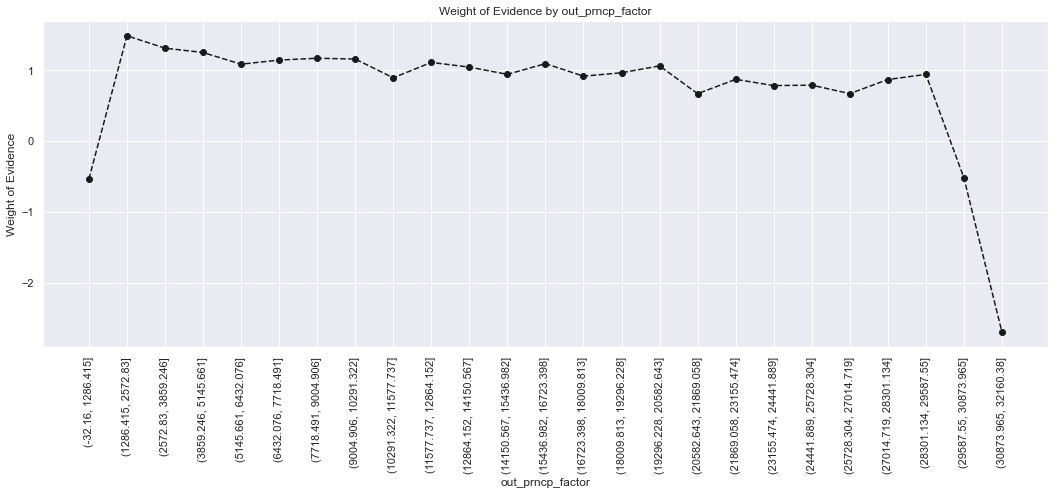

In [463]:
plot_by_woe(df_out_prncp,90)

In [464]:
# category
# '<1286','1286-5146','5146-10291','10291-15437','15437-20583','>20583'
df_inputs_prepr['out_prncp:<=1286'] = np.where((df_inputs_prepr['out_prncp'] <= 1286), 1, 0)
df_inputs_prepr['out_prncp:1286-5146'] = np.where((df_inputs_prepr['out_prncp'] > 1286) & (df_inputs_prepr['out_prncp'] <= 5146), 1, 0)
df_inputs_prepr['out_prncp:5146-10291'] = np.where((df_inputs_prepr['out_prncp'] > 5146) & (df_inputs_prepr['out_prncp'] <= 10291), 1, 0)
df_inputs_prepr['out_prncp:10291-15437'] = np.where((df_inputs_prepr['out_prncp'] > 10291) & (df_inputs_prepr['out_prncp'] <= 15437), 1, 0)
df_inputs_prepr['out_prncp:15437-20583'] = np.where((df_inputs_prepr['out_prncp'] > 15437) & (df_inputs_prepr['out_prncp'] <= 20583), 1, 0)
df_inputs_prepr['out_prncp:>20583'] = np.where((df_inputs_prepr['out_prncp'] > 20583), 1, 0)

### months_since_last_credit_pull_d

In [465]:
df_inputs_prepr['months_since_last_credit_pull_d'].unique()

array([ 23.,  24.,  82.,  38.,  30.,  26.,  25.,  32.,  40.,  27.,  72.,
        79.,  68.,  46.,  34.,  31.,  52.,  35.,  29.,  37.,  28.,  60.,
        62.,  43.,  33.,  45.,  75.,  36.,  58.,  48.,  39.,  71.,  67.,
        53.,  80.,  44.,  41.,  70.,  42.,  51.,  69.,  56.,  65.,  49.,
        57.,  47.,  50.,  54.,  64.,  89.,  77.,  76.,  93.,  86.,  61.,
        59.,  55.,  83.,  98.,  85.,  84.,  73.,  74.,  63.,  97.,  81.,
        92., 112.,  78.,  88.,  66.,  87., 107.,  95.,  91.,  94., 103.,
        nan, 119., 101., 110., 104.,  90.,  96.,  99., 118., 100., 108.,
       123., 102., 113., 124., 126., 117., 111., 125., 106., 105., 121.,
       127., 115., 122., 120., 114.])

In [466]:
df_inputs_prepr['months_since_last_credit_pull_d'].isna().sum()

31

In [467]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['months_since_last_credit_pull_d'])]
df_inputs_prepr_temp = df_inputs_prepr_temp.loc[df_inputs_prepr_temp['months_since_last_credit_pull_d'] <=75,:]

In [468]:
df_mnths_credit_pull = woe_ordered_continuous(df_inputs_prepr_temp, 'months_since_last_credit_pull_d' , df_targets_prepr[df_inputs_prepr_temp.index])
df_mnths_credit_pull

,months_since_last_credit_pull_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,23.0,262210,0.916758,0.708369,240383.0,21827.0,0.730743,0.529743,0.321670,NaN,NaN,inf
1,24.0,11122,0.775400,0.030046,8624.0,2498.0,0.026216,0.060627,-0.838357,0.141357,1.160027,inf
2,25.0,6749,0.989332,0.018233,6677.0,72.0,0.020297,0.001747,2.452342,0.213932,3.290699,inf
3,26.0,6377,0.986357,0.017228,6290.0,87.0,0.019121,0.002111,2.203392,0.002975,0.248950,inf
4,27.0,6480,0.883488,0.017506,5725.0,755.0,0.017403,0.018324,-0.051536,0.102870,2.254928,inf
5,28.0,5210,0.848177,0.014075,4419.0,791.0,0.013433,0.019198,-0.357045,0.035311,0.305509,inf
6,29.0,5892,0.851324,0.015917,5016.0,876.0,0.015248,0.021261,-0.332394,0.003147,0.024651,inf
7,30.0,4927,0.836615,0.013310,4122.0,805.0,0.012531,0.019537,-0.444164,0.014709,0.111771,inf
8,31.0,4242,0.833569,0.011460,3536.0,706.0,0.010749,0.017135,-0.466280,0.003046,0.022115,inf
9,32.0,4526,0.830535,0.012227,3759.0,767.0,0.011427,0.018615,-0.487995,0.003034,0.021715,inf


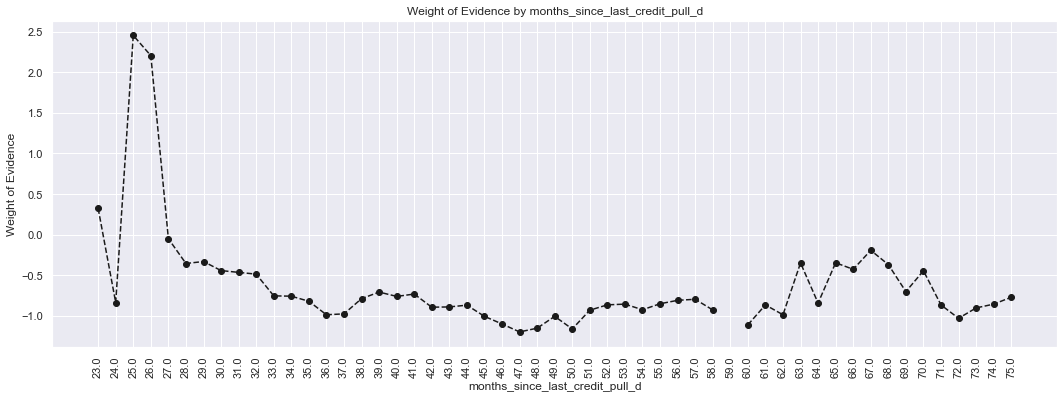

In [469]:
plot_by_woe(df_mnths_credit_pull,90)

In [470]:
# Category
# '23' ,'24', '25-26', '27-32', '33-35','36-37','38-44','45-50','58-62', '63-75','>75'
df_inputs_prepr['months_since_last_credit_pull_d:missing'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isnull()), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:23'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'] == 23), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:24'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'] == 24), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:25-26'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(25,27))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:27-32'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(27,33))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:33-35'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(33,36))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:36-37'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(36,38))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:38-44'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(38,45))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:45-50'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(45,51))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:51-62'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(51,63))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:63-75'] = np.where((df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(63,75))), 1, 0)
df_inputs_prepr['months_since_last_credit_pull_d:>75'] = np.where(df_inputs_prepr['months_since_last_credit_pull_d'].isin(range(75, int(df_inputs_prepr['months_since_last_credit_pull_d'].max()))), 1, 0)

### revol_util

In [471]:
df_inputs_prepr['revol_util'].nunique()

1237

In [472]:
df_inputs_prepr['revol_util'].isna().sum()

268

In [473]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['revol_util'])]
df_inputs_prepr_temp = df_inputs_prepr_temp.loc[df_inputs_prepr_temp['revol_util'] <=100,:]

In [474]:
df_inputs_prepr_temp['revol_util_factor'] = pd.cut(df_inputs_prepr_temp['revol_util'], 10)
df_revol_util_temp_factor = woe_ordered_continuous(df_inputs_prepr_temp, 'revol_util_factor' , df_targets_prepr[df_inputs_prepr_temp.index])
df_revol_util_temp_factor

,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.1, 10.0]",12727,0.910348,0.034236,11586.0,1141.0,0.035088,0.027460,0.245152,NaN,NaN,0.026238
1,"(10.0, 20.0]",17044,0.919268,0.045848,15668.0,1376.0,0.047451,0.033115,0.359699,0.008920,0.114547,0.026238
2,"(20.0, 30.0]",27399,0.907405,0.073703,24862.0,2537.0,0.075295,0.061056,0.209617,0.011862,0.150081,0.026238
3,"(30.0, 40.0]",39349,0.904877,0.105849,35606.0,3743.0,0.107833,0.090080,0.179886,0.002529,0.029732,0.026238
4,"(40.0, 50.0]",48852,0.895235,0.131412,43734.0,5118.0,0.132449,0.123171,0.072621,0.009642,0.107265,0.026238
5,"(50.0, 60.0]",54857,0.890843,0.147565,48869.0,5988.0,0.148000,0.144109,0.026645,0.004391,0.045976,0.026238
6,"(60.0, 70.0]",54976,0.883204,0.147885,48555.0,6421.0,0.147049,0.154529,-0.049617,0.007640,0.076262,0.026238
7,"(70.0, 80.0]",50272,0.875915,0.135231,44034.0,6238.0,0.133357,0.150125,-0.118438,0.007289,0.068821,0.026238
8,"(80.0, 90.0]",40611,0.868730,0.109243,35280.0,5331.0,0.106846,0.128297,-0.182963,0.007185,0.064525,0.026238
9,"(90.0, 100.0]",25661,0.857410,0.069028,22002.0,3659.0,0.066633,0.088058,-0.278797,0.011320,0.095834,0.026238


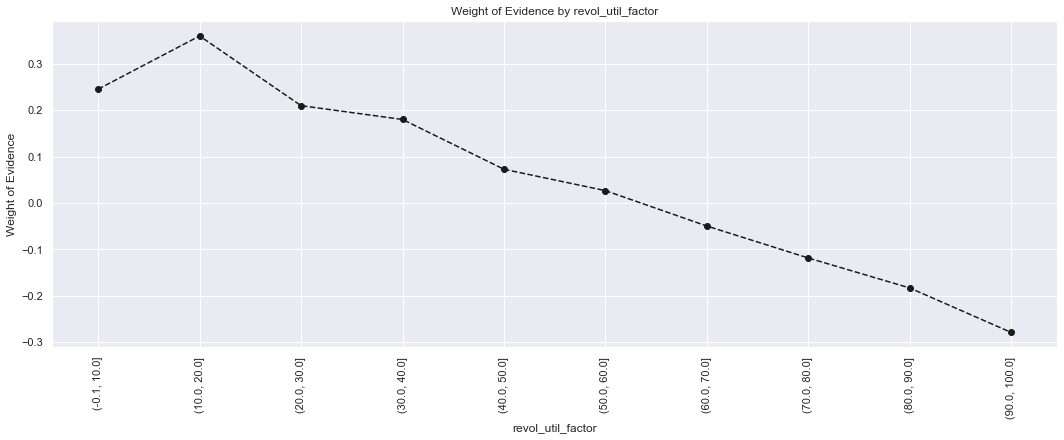

In [475]:
plot_by_woe(df_revol_util_temp_factor,90)

In [476]:
df_inputs_prepr['revol_util:missing'] = np.where(df_inputs_prepr['revol_util'].isnull(), 1, 0)
df_inputs_prepr['revol_util:<10'] = np.where((df_inputs_prepr['revol_util'] <= 10), 1, 0)
df_inputs_prepr['revol_util:10-20'] = np.where((df_inputs_prepr['revol_util'] > 10) & (df_inputs_prepr['revol_util'] <= 20), 1, 0)
df_inputs_prepr['revol_util:20-30'] = np.where((df_inputs_prepr['revol_util'] > 20) & (df_inputs_prepr['revol_util'] <= 30), 1, 0)
df_inputs_prepr['revol_util:30-40'] = np.where((df_inputs_prepr['revol_util'] > 30) & (df_inputs_prepr['revol_util'] <= 40), 1, 0)
df_inputs_prepr['revol_util:40-50'] = np.where((df_inputs_prepr['revol_util'] > 40) & (df_inputs_prepr['revol_util'] <= 50), 1, 0)
df_inputs_prepr['revol_util:50-60'] = np.where((df_inputs_prepr['revol_util'] > 50) & (df_inputs_prepr['revol_util'] <= 60), 1, 0)
df_inputs_prepr['revol_util:60-70'] = np.where((df_inputs_prepr['revol_util'] > 60) & (df_inputs_prepr['revol_util'] <= 70), 1, 0)
df_inputs_prepr['revol_util:70-80'] = np.where((df_inputs_prepr['revol_util'] > 70) & (df_inputs_prepr['revol_util'] <= 80), 1, 0)
df_inputs_prepr['revol_util:80-90'] = np.where((df_inputs_prepr['revol_util'] > 80) & (df_inputs_prepr['revol_util'] <= 90), 1, 0)
df_inputs_prepr['revol_util:90-100'] = np.where((df_inputs_prepr['revol_util'] > 90) & (df_inputs_prepr['revol_util'] <= 100), 1, 0)
df_inputs_prepr['revol_util:>100'] = np.where((df_inputs_prepr['revol_util'] > 100), 1, 0)

### tot_cur_bal

In [477]:
df_inputs_prepr['tot_cur_bal'].nunique()

192101

In [478]:
df_inputs_prepr['tot_cur_bal'].isna().sum()

56233

In [479]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['tot_cur_bal'])]

In [480]:
df_inputs_prepr_temp = df_inputs_prepr_temp.loc[df_inputs_prepr_temp['tot_cur_bal']<=640000,:]
df_inputs_prepr_temp['tot_cur_bal_factor'] = pd.cut(df_inputs_prepr_temp['tot_cur_bal'], 25)
df_tot_cur_bal = woe_ordered_continuous(df_inputs_prepr_temp, 'tot_cur_bal_factor' , df_targets_prepr[df_inputs_prepr_temp.index])
df_tot_cur_bal

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-640.0, 25600.0]",69966,0.882657,0.223161,61756.0,8210.0,0.219972,0.250473,-0.129851,NaN,NaN,0.030332
1,"(25600.0, 51200.0]",58386,0.881821,0.186226,51486.0,6900.0,0.183391,0.210507,-0.137901,0.000836,0.008050,0.030332
2,"(51200.0, 76800.0]",26502,0.885669,0.084530,23472.0,3030.0,0.083606,0.092440,-0.100444,0.003848,0.037457,0.030332
3,"(76800.0, 102400.0]",16879,0.894366,0.053837,15096.0,1783.0,0.053771,0.054396,-0.011557,0.008697,0.088887,0.030332
4,"(102400.0, 128000.0]",15264,0.891903,0.048685,13614.0,1650.0,0.048492,0.050339,-0.037366,0.002463,0.025809,0.030332
5,"(128000.0, 153600.0]",16251,0.896929,0.051834,14576.0,1675.0,0.051919,0.051101,0.015874,0.005027,0.053240,0.030332
6,"(153600.0, 179200.0]",16529,0.901204,0.052720,14896.0,1633.0,0.053059,0.049820,0.062985,0.004275,0.047111,0.030332
7,"(179200.0, 204800.0]",15431,0.900395,0.049218,13894.0,1537.0,0.049490,0.046891,0.053935,0.000809,0.009049,0.030332
8,"(204800.0, 230400.0]",13411,0.906196,0.042775,12153.0,1258.0,0.043288,0.038379,0.120364,0.005801,0.066428,0.030332
9,"(230400.0, 256000.0]",11750,0.913191,0.037477,10730.0,1020.0,0.038220,0.031118,0.205552,0.006995,0.085188,0.030332


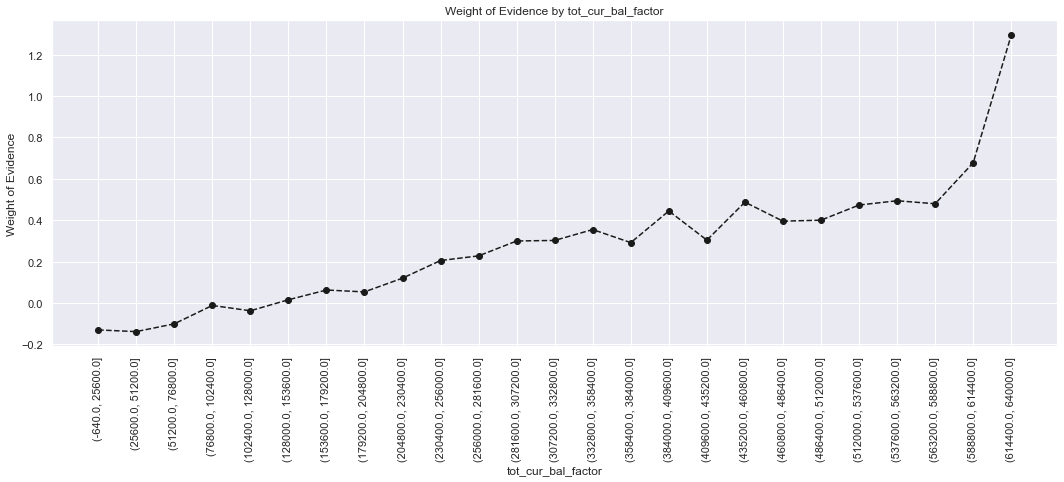

In [481]:
plot_by_woe(df_tot_cur_bal,90)

In [482]:
df_inputs_prepr['tot_cur_bal:missing'] = np.where(df_inputs_prepr['tot_cur_bal'].isnull(), 1, 0)
df_inputs_prepr['tot_cur_bal:<=76800'] = np.where((df_inputs_prepr['tot_cur_bal'] <= 76800), 1, 0)
df_inputs_prepr['tot_cur_bal:76800-204800'] = np.where((df_inputs_prepr['tot_cur_bal'] > 76800) & (df_inputs_prepr['tot_cur_bal'] <= 204800), 1, 0)
df_inputs_prepr['tot_cur_bal:204800-358400'] = np.where((df_inputs_prepr['tot_cur_bal'] > 204800) & (df_inputs_prepr['tot_cur_bal'] <= 358400), 1, 0)
df_inputs_prepr['tot_cur_bal:358400-588800'] = np.where((df_inputs_prepr['tot_cur_bal'] > 358400) & (df_inputs_prepr['tot_cur_bal'] <= 588800), 1, 0)
df_inputs_prepr['tot_cur_bal:>588800'] = np.where((df_inputs_prepr['tot_cur_bal'] > 588800), 1, 0)

### total_rec_int

In [483]:
df_inputs_prepr['total_rec_int'].nunique()

231552

In [484]:
df_inputs_prepr['total_rec_int'].isna().sum()

0

In [485]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['total_rec_int']<=10000,:]
df_inputs_prepr_temp['total_rec_int'] = pd.cut(df_inputs_prepr_temp['total_rec_int'], 25)
df_total_rec_int = woe_ordered_continuous(df_inputs_prepr_temp, 'total_rec_int' , df_targets_prepr[df_inputs_prepr_temp.index])
df_total_rec_int

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/1715989840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['total_rec_int'] = pd.cut(df_inputs_prepr_temp['total_rec_int'], 25)


,total_rec_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-10.0, 399.992]",26347,0.839906,0.072147,22129.0,4218.0,0.068260,0.102881,-0.410242,NaN,NaN,0.020661
1,"(399.992, 799.985]",46762,0.875219,0.128050,40927.0,5835.0,0.126245,0.142321,-0.119854,0.035313,0.290388,0.020661
2,"(799.985, 1199.977]",49457,0.889197,0.135430,43977.0,5480.0,0.135654,0.133662,0.014792,0.013977,0.134646,0.020661
3,"(1199.977, 1599.97]",43062,0.891552,0.117918,38392.0,4670.0,0.118426,0.113905,0.038920,0.002355,0.024128,0.020661
4,"(1599.97, 1999.962]",36254,0.896756,0.099276,32511.0,3743.0,0.100285,0.091295,0.093921,0.005205,0.055001,0.020661
5,"(1999.962, 2399.954]",30261,0.896335,0.082865,27124.0,3137.0,0.083668,0.076514,0.089382,0.000421,0.004539,0.020661
6,"(2399.954, 2799.947]",23918,0.896438,0.065496,21441.0,2477.0,0.066138,0.060416,0.090487,0.000103,0.001105,0.020661
7,"(2799.947, 3199.939]",19310,0.899793,0.052877,17375.0,1935.0,0.053596,0.047196,0.127155,0.003355,0.036668,0.020661
8,"(3199.939, 3599.932]",14929,0.895237,0.040881,13365.0,1564.0,0.041226,0.038147,0.077623,0.004555,0.049532,0.020661
9,"(3599.932, 3999.924]",12126,0.893122,0.033205,10830.0,1296.0,0.033407,0.031611,0.055268,0.002115,0.022355,0.020661


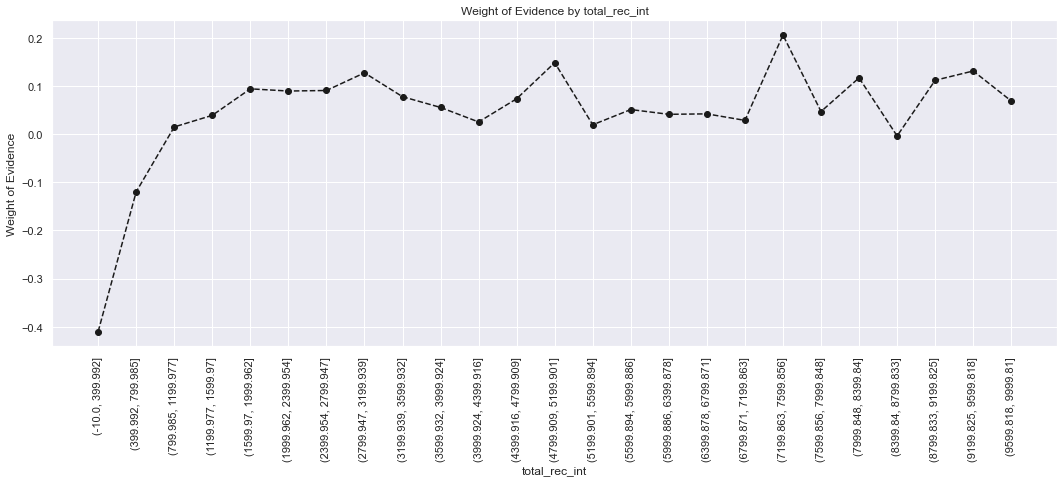

In [486]:
plot_by_woe(df_total_rec_int,90)

In [487]:
df_inputs_prepr['total_rec_int:<=400'] = np.where((df_inputs_prepr['total_rec_int'] <= 400), 1, 0)
df_inputs_prepr['total_rec_int:400-800'] = np.where((df_inputs_prepr['total_rec_int'] > 400) & (df_inputs_prepr['total_rec_int'] <= 800), 1, 0)
df_inputs_prepr['total_rec_int:800-1600'] = np.where((df_inputs_prepr['total_rec_int'] > 800) & (df_inputs_prepr['total_rec_int'] <= 1600), 1, 0)
df_inputs_prepr['total_rec_int:1600-2800'] = np.where((df_inputs_prepr['total_rec_int'] > 1600) & (df_inputs_prepr['total_rec_int'] <= 2800), 1, 0)
df_inputs_prepr['total_rec_int:2800-5200'] = np.where((df_inputs_prepr['total_rec_int'] > 2800) & (df_inputs_prepr['total_rec_int'] <= 5200), 1, 0)
df_inputs_prepr['total_rec_int:5200-7200'] = np.where((df_inputs_prepr['total_rec_int'] > 5200) & (df_inputs_prepr['total_rec_int'] <= 7200), 1, 0)
df_inputs_prepr['total_rec_int:>7200'] = np.where((df_inputs_prepr['total_rec_int'] > 7200), 1, 0)

### revol_bal

In [488]:
df_inputs_prepr['revol_bal'].nunique()

54680

In [489]:
df_inputs_prepr['revol_bal'].isna().sum()

0

In [490]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['revol_bal']<=103000,:]

In [491]:
df_inputs_prepr_temp['revol_bal_factor'] = pd.cut(df_inputs_prepr_temp['revol_bal'], 25)
df_revol_bal = woe_ordered_continuous(df_inputs_prepr_temp, 'revol_bal_factor' , df_targets_prepr[df_inputs_prepr_temp.index])
df_revol_bal

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_39760/138548696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['revol_bal_factor'] = pd.cut(df_inputs_prepr_temp['revol_bal'], 25)


,revol_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-102.973, 4118.92]",49765,0.883794,0.134314,43982.0,5783.0,0.133697,0.139195,-0.040298,NaN,NaN,0.005408
1,"(4118.92, 8237.84]",77650,0.884160,0.209574,68655.0,8995.0,0.208699,0.216507,-0.036731,0.000366,0.003567,0.005408
2,"(8237.84, 12356.76]",67527,0.883439,0.182253,59656.0,7871.0,0.181343,0.189453,-0.043747,0.000720,0.007015,0.005408
3,"(12356.76, 16475.68]",50587,0.884456,0.136532,44742.0,5845.0,0.136008,0.140687,-0.033830,0.001017,0.009916,0.005408
4,"(16475.68, 20594.6]",36009,0.888195,0.097187,31983.0,4026.0,0.097223,0.096905,0.003275,0.003738,0.037105,0.005408
5,"(20594.6, 24713.52]",25273,0.891228,0.068211,22524.0,2749.0,0.068469,0.066168,0.034188,0.003033,0.030913,0.005408
6,"(24713.52, 28832.44]",18479,0.894962,0.049874,16538.0,1941.0,0.050273,0.046719,0.073301,0.003734,0.039113,0.005408
7,"(28832.44, 32951.36]",13257,0.899223,0.035780,11921.0,1336.0,0.036238,0.032157,0.119465,0.004261,0.046164,0.005408
8,"(32951.36, 37070.28]",9450,0.900529,0.025505,8510.0,940.0,0.025869,0.022626,0.133961,0.001306,0.014496,0.005408
9,"(37070.28, 41189.2]",6611,0.907427,0.017843,5999.0,612.0,0.018236,0.014731,0.213460,0.006898,0.079498,0.005408


We discard this feature due to very low value of IV

## 2.5 Preprocessing the Test Dataset

In [492]:
# X_train_new = df_inputs_prepr.copy()
X_test_new = df_inputs_prepr.copy()

After creating all dummy variables, we assign X_train_new to df_inputs_prepr.copy() which contains all of the needed variables. At the same time, we need X_test data to have the same variables as X_train, so we comeback to 2.4, set up as (df_inputs_prepr = X_test.copy(); df_targets_prepr = y_test.copy()) and re-run the code. Finally, we assign X_test_new to df_inputs_prepr.copy().

In [493]:
# Drop interval object so we can save to csv file
for i in X_train_new.columns.values:
    if isinstance(X_train_new[i].to_list()[1],pd.Interval) == True:
        X_train_new.drop(columns =[i], inplace =True)

In [494]:
# Drop interval object so we can save to csv file
for i in X_test_new.columns.values:
    if isinstance(X_test_new[i].to_list()[1],pd.Interval) == True:
        X_test_new.drop(columns =[i], inplace =True)

In [495]:
# Save to CSV file
X_train_new.to_csv('X_train_new.csv')
y_train.to_csv('y_train.csv')
X_test_new.to_csv('X_test_new.csv')
y_test.to_csv('y_test.csv')

In [496]:
X_test_new.columns.values

array(['funded_amnt', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'tot_cur_bal',
       'total_rev_hi_lim', 'emp_length_int', 'term_int',
       'months_since_earliest_cr_line', 'months_since_issue_d',
       'months_since_last_pymnt_d', 'months_since_last_credit_pull_d',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified'